In [1]:
import parmap
import TO_sim.parmap_use as PU
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import TO_sim.analytical.order_sec_parameter as OSP

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

from TO_sim.get_sec_r import get_r_Fun,get_rp,get_rp2,get_rp3,integrand_Rd3
from tqdm.notebook import tqdm
from parfor import parfor

In [119]:
N = 500
K = 5

In [96]:
temp = glob.glob(rf'./Ensembles/wo_pvel/N = {N} K = {K} *.npz')

In [97]:
A = np.load(temp[0])
T = []
for f in temp[1:2]:
    B =  np.load(f)
    for num,(i,j) in enumerate(zip(A.values(),B.values())):
        if num!=0:
            temp_ = np.concatenate([i,j],axis=1)
            T.append(temp_)
        
for f in temp[2:]:
    B =  np.load(f)
    for num,(j) in enumerate(B.values()):
        if num!=0:
            temp_ = np.concatenate([T[num-1],j],axis=1)
            T[num-1] = temp_


In [98]:
ms = A['ms']

In [99]:
S0,SP,SM,R0,RM0,RP,RPT,RM,RMT,V0,VP,VM,SIG,SIGP,SIGM  = T

In [201]:
N = 4000
K = 5

A = np.load(f'./Ensembles/wo_pvel/N = {N} K = {K}.npz')
# A = np.load(f'./Ensembles/N = {N} K = {K}.npz')
# ms,S0,SP,SM,R0,RP,RM=A.values()

ms_,S0,SP,SM,R0,RM0,RP,RPT,RM,RMT,V0,VP,VM,SIG,SIGP,SIGM = A.values()


In [202]:
S0_m = np.nanmean(S0,axis=1)
S0_std = np.nanstd(S0,axis=1)
SP_m = np.nanmean(SP,axis=1)
SP_std = np.nanstd(SP,axis=1)
SM_m = np.nanmean(SM,axis=1)
SM_std = np.nanstd(SM,axis=1)


R0_m = np.nanmean(R0,axis=1)
R0_std = np.nanstd(R0,axis=1)
RP_m = np.nanmean(RP,axis=1)
RP_std = np.nanstd(RP,axis=1)
RM_m = np.nanmean(RM,axis=1)
RM_std = np.nanstd(RM,axis=1)

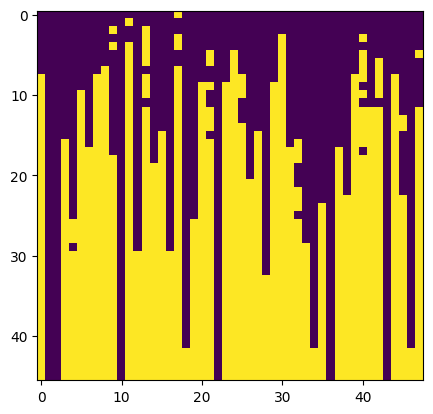

In [203]:
plt.imshow(np.isnan(R0))
# plt.imshow(np.isnan(RM0))

# Make Analytic line

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

from TO_sim.get_sec_r import get_r_Fun,get_rp,get_rp2,get_rp3,integrand_Rd3
from tqdm.notebook import tqdm
from parfor import parfor

In [134]:
ms = np.arange(3,8,0.05)
A_rp = np.zeros_like(ms)
A_rp0 = np.zeros_like(ms)
A_r_d = np.zeros_like(ms)
A_r0 = np.zeros_like(ms)
A_ops = np.zeros_like(ms)
A_sigma = np.zeros_like(ms)
for i,m in enumerate(tqdm(ms)):
# @parfor (ms)
# def get_RR(m):
    F = get_r_Fun(m)
    R_0u = F['u']['R0'](K)
    R_d = F['u']['RD'](K)
    OPS = F['u']['OPS'](K)
    _,rp_d,rp_u,rp0_d,rp0_u = get_rp2(K,R_0u,OPS,m,MAX=False)
    sigma = 2*rp_u * np.sqrt(1/2  - m*K*R_0u / (4*(4*m**2 * OPS**2 + 1)) - ((m*K*R_0u)/(2*(m**2*OPS**2 + 1)))**2)
    A_rp[i] = rp_u
    A_rp0[i] = rp0_u
    A_r_d[i] = R_d
    A_r0[i] = R_0u
    A_ops[i] = OPS
    A_sigma[i] = sigma
    
    


  0%|          | 0/100 [00:00<?, ?it/s]

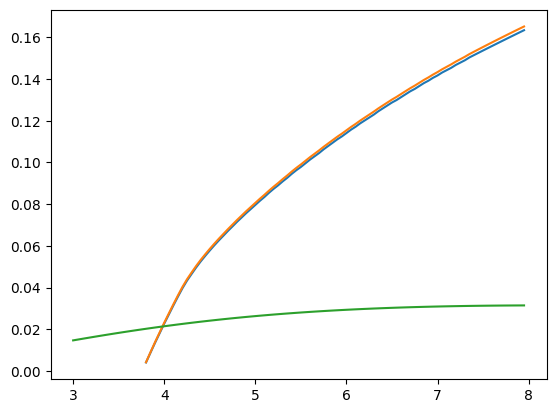

In [146]:
plt.plot(ms,A_rp)
plt.plot(ms,A_rp0)
# plt.plot(ms,A_r0)
plt.plot(ms,-A_r_d/2)

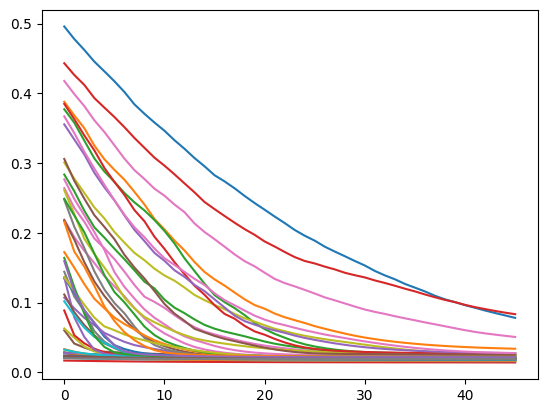

In [178]:
plt.plot(RM0)

In [188]:
N_R0 = ~np.isnan(R0)

RPT_NAN = np.where(N_R0,RPT,np.nan)
RMT_NAN = np.where(N_R0,RMT,np.nan)


RP_NAN_m = np.nanmean(RPT_NAN,axis=1)
RP_NAN_std = np.nanstd(RPT_NAN,axis=1)
RM_NAN_m = np.nanmean(RMT_NAN,axis=1)
RM_NAN_std = np.nanstd(RMT_NAN,axis=1)

In [189]:
df_Km = pd.read_excel('Order parameter and secondary cluster NEW.xlsm',index_col=[0,1])
df_K = df_Km.query('K == 5').reset_index().set_index('m')

In [105]:
df_K

,K,rM_u,rM_d,r0_u,r0_d,rd_u,rd_d,r+_ul,r+_drift,mu,r+_total_u,r+_total_d,r+_total_ul,r+_total_ud
m,,,,,,,,,,,,,,
0.0,5.0,0.978364,0.978364,0.978364,0.978364,0.000000e+00,0.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
0.1,5.0,0.978364,NaN,0.978364,NaN,1.942163e-07,NaN,NaN,9.710814e-08,NaN,NaN,NaN,NaN,NaN
0.2,5.0,0.978363,NaN,0.978364,NaN,4.978953e-07,NaN,NaN,2.489476e-07,NaN,NaN,NaN,NaN,NaN
0.3,5.0,0.978353,NaN,0.978358,NaN,4.422220e-06,NaN,NaN,2.211110e-06,NaN,NaN,NaN,NaN,NaN
0.4,5.0,0.978287,NaN,0.978312,NaN,2.462596e-05,NaN,NaN,1.231298e-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14.6,5.0,0.199361,0.005957,0.251841,0.018855,5.247997e-02,0.012898,0.168825,2.623998e-02,NaN,0.168825,NaN,NaN,NaN
14.7,5.0,0.197881,0.005960,0.250172,0.018821,5.229144e-02,0.012860,0.168396,2.614572e-02,NaN,0.168396,NaN,NaN,NaN
14.8,5.0,0.196284,0.005972,0.248371,0.018801,5.208733e-02,0.012829,0.167963,2.604366e-02,NaN,0.167963,NaN,NaN,NaN


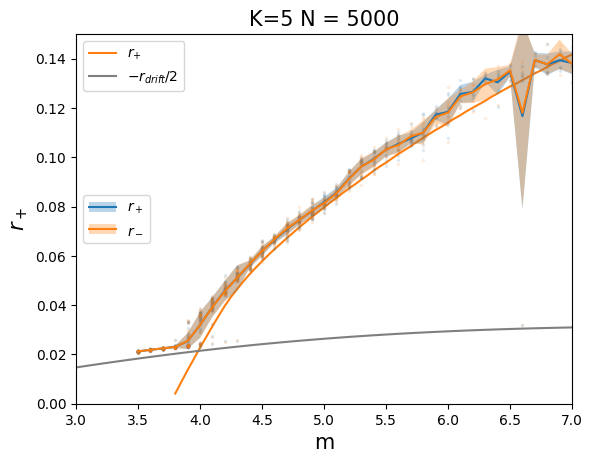

In [194]:
plt.plot(ms,A_rp,color ='tab:orange',label='$r_{+}$',zorder=0)
# plt.plot(ms,A_r0
plt.plot(ms,-A_r_d/2,color ='tab:gray',label='$-r_{drift}/2$',zorder=0)

Pls=plt.plot(ms_,RPT_NAN,'.',color='tab:blue',alpha=0.1,markersize=3)
Mls=plt.plot(ms_,RMT_NAN,'.',color='tab:orange',alpha=0.1,markersize=3)

lp,= plt.plot(ms_,RP_NAN_m)
lfp =plt.fill_between(ms_,RP_NAN_m-RP_NAN_std,RP_NAN_m + RP_NAN_std,alpha=0.3)
lm, = plt.plot(ms_,RM_NAN_m)
lmp=plt.fill_between(ms_,RM_NAN_m-RM_NAN_std,RM_NAN_m + RM_NAN_std,alpha=0.3)

leg1 = plt.legend([(lp,lfp),(lm,lmp)],['$r_+$','$r_-$'],loc='center left')
plt.gca().add_artist(leg1)
plt.title(f'K={K} N = {N}',fontsize=15)
plt.xlabel(f'm',fontsize=15)
plt.ylabel(f'$r_+$',fontsize=15)
plt.xlim(3,7)
plt.ylim(0,0.15)
plt.legend()


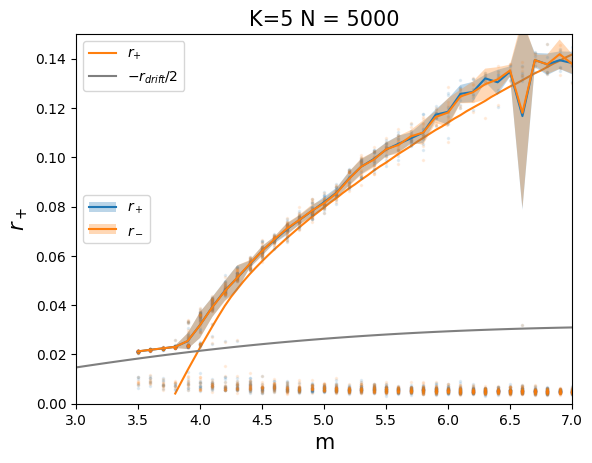

In [192]:
plt.plot(ms,A_rp,color ='tab:orange',label='$r_{+}$',zorder=0)
# plt.plot(ms,A_r0
plt.plot(ms,-A_r_d/2,color ='tab:gray',label='$-r_{drift}/2$',zorder=0)

Pls=plt.plot(ms_,RPT,'.',color='tab:blue',alpha=0.1,markersize=3)
Mls=plt.plot(ms_,RMT,'.',color='tab:orange',alpha=0.1,markersize=3)

lp,= plt.plot(ms_,RP_NAN_m)
lfp =plt.fill_between(ms_,RP_NAN_m-RP_NAN_std,RP_NAN_m + RP_NAN_std,alpha=0.3)
lm, = plt.plot(ms_,RM_NAN_m)
lmp=plt.fill_between(ms_,RM_NAN_m-RM_NAN_std,RM_NAN_m + RM_NAN_std,alpha=0.3)

leg1 = plt.legend([(lp,lfp),(lm,lmp)],['$r_+$','$r_-$'],loc='center left')
plt.gca().add_artist(leg1)
plt.title(f'K={K} N = {N}',fontsize=15)
plt.xlabel(f'm',fontsize=15)
plt.ylabel(f'$r_+$',fontsize=15)
plt.xlim(3,7)
plt.ylim(0,0.15)
plt.legend()


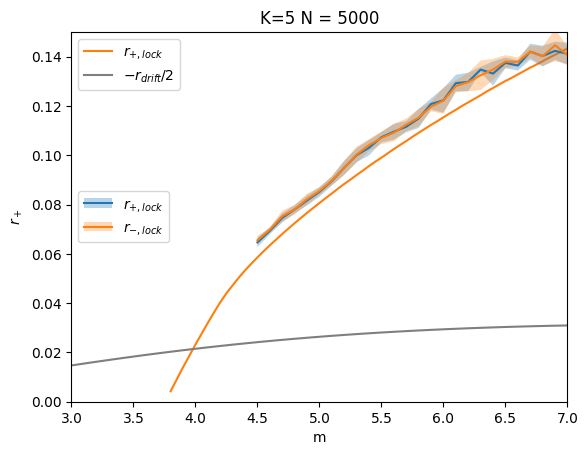

In [191]:
# plt.plot(ms,R0_m)
# plt.fill_between(ms,R0_m-R0_std,R0_m + R0_std,alpha=0.3)
lp,= plt.plot(ms_,RP_m)
lfp =plt.fill_between(ms_,RP_m-RP_std,RP_m + RP_std,alpha=0.3)
lm, = plt.plot(ms_,RM_m)
lmp=plt.fill_between(ms_,RM_m-RM_std,RM_m + RM_std,alpha=0.3)


# Pls=plt.plot(ms_,RPT,'.',color='tab:blue',alpha=0.1,markersize=3)
# Mls=plt.plot(ms_,RMT,'.',color='tab:orange',alpha=0.1,markersize=3)

leg1 = plt.legend([(lp,lfp),(lm,lmp)],['$r_{+,lock}$','$r_{-,lock}$'],loc='center left')
plt.gca().add_artist(leg1)
# plt.plot(df_K['r0_u'],color ='tab:blue',label='$r_0$',zorder=0)
plt.plot(ms,A_rp0,color ='tab:orange',label='$r_{+,lock}$',zorder=0)
# plt.plot(ms,A_r0
plt.plot(ms,-A_r_d/2,color ='tab:gray',label='$-r_{drift}/2$',zorder=0)

# plt.plot(df_K['r+_ul'],color ='tab:orange',label='$r_{+,lock}$',zorder=0)
# plt.plot(df_K['r+_total_ul'],color ='tab:red',label='$r_{+}$',zorder=0)
# plt.plot(df_K['r+_drift'],color ='tab:grey',label='$r_{drift}/2$',zorder=0)
# ms_ = df_K.index.to_numpy(float)
# rstd = OSP.get_rstd(df_K['r0_u'].to_numpy(float),df_K['r+_ul'].to_numpy(float),5,ms_)


plt.legend(loc=2)
plt.xlim(3,7)
plt.ylim(0,0.15)
# plt.axvline(Ks_check2[~np.isnan(mu)][0]
plt.title(f'K={K} N = {N}')
plt.xlabel(f'm')
plt.ylabel(f'$r_+$')

plt.legend()

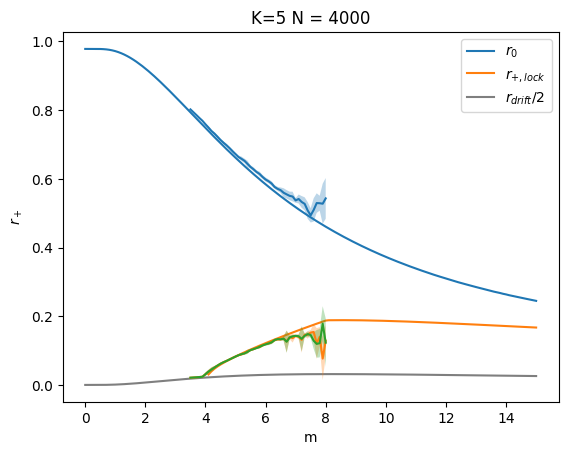

In [48]:
plt.plot(ms,R0_m)
plt.fill_between(ms,R0_m-R0_std,R0_m + R0_std,alpha=0.3)
plt.plot(ms,RP_m)
plt.fill_between(ms,RP_m-RP_std,RP_m + RP_std,alpha=0.3)
plt.plot(ms,RM_m)
plt.fill_between(ms,RM_m-RM_std,RM_m + RM_std,alpha=0.3)


# plt.plot(ms,RPT,',')

plt.plot(df_K['r0_u'],color ='tab:blue',label='$r_0$',zorder=0)
plt.plot(df_K['r+_ul'],color ='tab:orange',label='$r_{+,lock}$',zorder=0)
plt.plot(df_K['r+_drift'],color ='tab:grey',label='$r_{drift}/2$',zorder=0)
ms_ = df_K.index.to_numpy(float)
# rstd = OSP.get_rstd(df_K['r0_u'].to_numpy(float),df_K['r+_ul'].to_numpy(float),5,ms_)


plt.legend()
# plt.axvline(Ks_check2[~np.isnan(mu)][0]
plt.title(f'K={K} N = {N}')
plt.xlabel(f'm')
plt.ylabel(f'$r_+$')

plt.legend()

In [58]:
rd_u

NameError: name 'rd_u' is not defined

In [60]:
df_K['r+_drift'],df_K['rd_u']

(m
 0.0     0.000000e+00
 0.1     9.710814e-08
 0.2     2.489476e-07
 0.3     2.211110e-06
 0.4     1.231298e-05
             ...     
 14.6    2.623998e-02
 14.7    2.614572e-02
 14.8    2.604366e-02
 14.9    2.594423e-02
 15.0    2.583850e-02
 Name: r+_drift, Length: 151, dtype: float64,
 m
 0.0     0.000000e+00
 0.1     1.942163e-07
 0.2     4.978953e-07
 0.3     4.422220e-06
 0.4     2.462596e-05
             ...     
 14.6    5.247997e-02
 14.7    5.229144e-02
 14.8    5.208733e-02
 14.9    5.188846e-02
 15.0    5.167700e-02
 Name: rd_u, Length: 151, dtype: float64)

In [ ]:
# plt.plot(ms,R0_m)
# plt.fill_between(ms,R0_m-R0_std,R0_m + R0_std,alpha=0.3)
lp,= plt.plot(ms,RP_m)
lfp =plt.fill_between(ms,RP_m-RP_std,RP_m + RP_std,alpha=0.3)
lm, = plt.plot(ms,RM_m)
lmp=plt.fill_between(ms,RM_m-RM_std,RM_m + RM_std,alpha=0.3)


Pls=plt.plot(ms,RPT_NAN,'.',color='tab:blue',alpha=0.1,markersize=3)
Mls=plt.plot(ms,RMT_NAN,'.',color='tab:orange',alpha=0.1,markersize=3)

leg1 = plt.legend([(lp,lfp),(lm,lmp)],['$r_+$','$r_-$'],loc='center left')
plt.gca().add_artist(leg1)
# plt.plot(df_K['r0_u'],color ='tab:blue',label='$r_0$',zorder=0)
plt.plot(df_K['r+_ul'],color ='tab:orange',label='$r_{+,lock}$',zorder=0)
# plt.plot(df_K['r+_total_ul'],color ='tab:red',label='$r_{+}$',zorder=0)
plt.plot(df_K['r+_drift'],color ='tab:grey',label='$r_{drift}/2$',zorder=0)
ms_ = df_K.index.to_numpy(float)
# rstd = OSP.get_rstd(df_K['r0_u'].to_numpy(float),df_K['r+_ul'].to_numpy(float),5,ms_)


plt.legend(loc=2)
plt.xlim(3,7)
# plt.ylim(0,0.15)
# plt.axvline(Ks_check2[~np.isnan(mu)][0]
plt.title(f'K={K} N = {N}')
plt.xlabel(f'm')
plt.ylabel(f'$r_+$')

plt.legend()

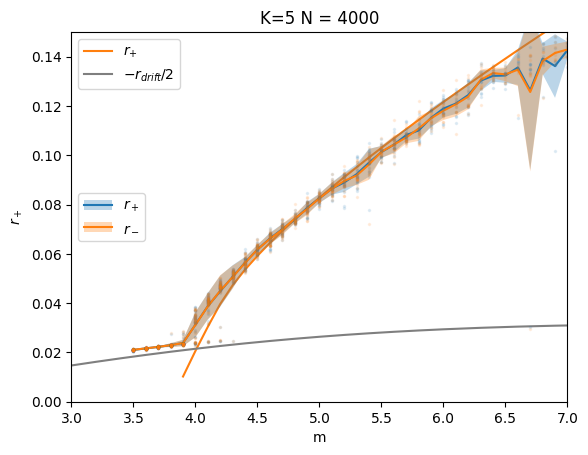

In [65]:
# plt.plot(ms,R0_m)
# plt.fill_between(ms,R0_m-R0_std,R0_m + R0_std,alpha=0.3)
lp,= plt.plot(ms,RP_m)
lfp =plt.fill_between(ms,RP_m-RP_std,RP_m + RP_std,alpha=0.3)
lm, = plt.plot(ms,RM_m)
lmp=plt.fill_between(ms,RM_m-RM_std,RM_m + RM_std,alpha=0.3)


Pls=plt.plot(ms,RPT_NAN,'.',color='tab:blue',alpha=0.1,markersize=3)
Mls=plt.plot(ms,RMT_NAN,'.',color='tab:orange',alpha=0.1,markersize=3)

leg1 = plt.legend([(lp,lfp),(lm,lmp)],['$r_+$','$r_-$'],loc='center left')
plt.gca().add_artist(leg1)
# plt.plot(df_K['r0_u'],color ='tab:blue',label='$r_0$',zorder=0)
plt.plot(df_K['r+_total_u'],color ='tab:orange',label='$r_{+}$',zorder=0)
# plt.plot(df_K['r+_u'],color ='tab:orange',label='$r_{-}$',zorder=0)
# plt.plot(df_K['r+_total_ul'],color ='tab:red',label='$r_{+}$',zorder=0)
plt.plot(df_K['r+_drift'],color ='tab:grey',label='$-r_{drift}/2$',zorder=0)
# plt.plot(df_K['rd_u']/2,color ='tab:grey',label='$r_{drift}/2$',zorder=0)
ms_ = df_K.index.to_numpy(float)
# rstd = OSP.get_rstd(df_K['r0_u'].to_numpy(float),df_K['r+_ul'].to_numpy(float),5,ms_)


plt.legend(loc=2)
plt.xlim(3,7)
plt.ylim(0,0.15)
# plt.axvline(Ks_check2[~np.isnan(mu)][0]
plt.title(f'K={K} N = {N}')
plt.xlabel(f'm')
plt.ylabel(f'$r_+$')

plt.legend()

# simulation and check $r_{\rm{drift}}$

평균 위상을 $\omega$에 대해서 적분하는 경우

In [189]:
K = 9

In [190]:
ms = np.arange(4,5.01,0.01)
A_rp = np.zeros_like(ms)
A_rp0 = np.zeros_like(ms)
A_r_d = np.zeros_like(ms)
A_r0 = np.zeros_like(ms)
A_rM = np.zeros_like(ms)
A_ops = np.zeros_like(ms)
A_sigma = np.zeros_like(ms)
for i,m in enumerate(tqdm(ms)):
    F = get_r_Fun(m)
    R_0u = F['u']['R0'](K)
    R_d = F['u']['RD'](K)
    R_M = F['u']['R'](K)
    OPS = F['u']['OPS'](K)
    _,rp_d,rp_u,rp0_d,rp0_u = get_rp2(K,R_0u,OPS,m,MAX=False)
    sigma = 2*rp_u * np.sqrt(1/2  - m*K*R_0u / (4*(4*m**2 * OPS**2 + 1)) - ((m*K*R_0u)/(2*(m**2*OPS**2 + 1)))**2)
    A_rp[i] = rp_u
    A_rp0[i] = rp0_u
    A_r_d[i] = R_d
    A_r0[i] = R_0u
    A_rM[i] = R_M
    A_ops[i] = OPS
    A_sigma[i] = sigma
    
    


  0%|          | 0/101 [00:00<?, ?it/s]

In [191]:
m_c = ms[np.where(-A_r_d/2 < A_rp0)[0][0]]
m_c

4.909999999999981

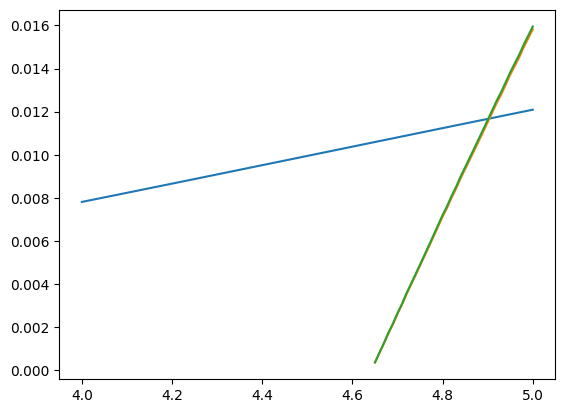

In [192]:
# plt.plot(ms,A_rM)
# plt.plot(ms,A_r0)
plt.plot(ms,-A_r_d/2)
plt.plot(ms,A_rp)
plt.plot(ms,A_rp0)
# plt.plot(ms,A_sigma)
# plt.plot(ms,A_ops)


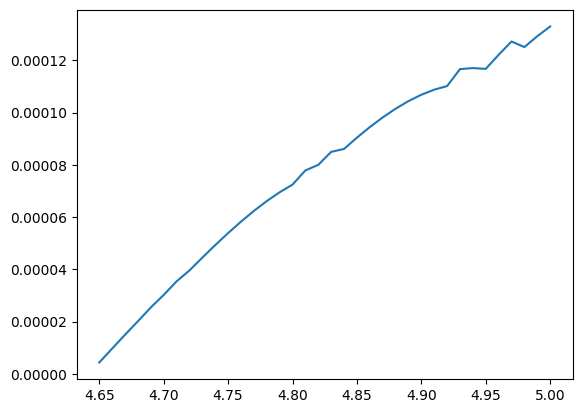

In [193]:
plt.plot(ms,-(A_rp-A_rp0))
# plt.plot(ms,A_rp0)

In [194]:
# simulation 
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.get_sec_r import get_r_Fun,get_rp

import numpy as np

In [211]:
seed =11
N = 1000
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
# theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)

omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 3.4
dt = 0.1
t = np.arange(0,8000,dt)
# K = 5.3
# K = 5
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
RP_S = {}
RM_S = {}
R0_S = {}
RP0_S = {}
RM0_S = {}
vt_m = {}
# theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=0*omega,p_omega=omega)

  0%|          | 0/21 [00:00<?, ?it/s]

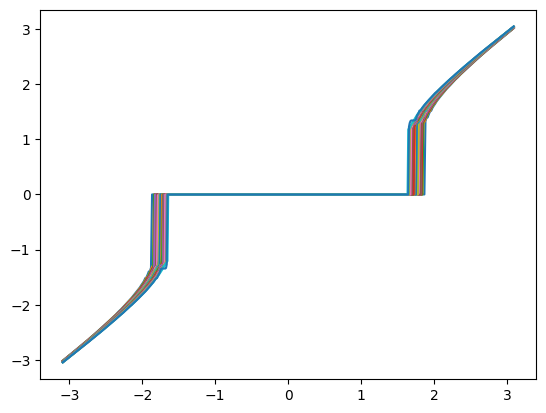

In [212]:
# for m in tqdm([2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5]):
for m in tqdm([4,4.05,4.1,4.15,4.2,4.25,4.3,4.35,4.4,4.45,4.5,4.55,4.6,4.65,4.7,4.75,4.8,4.85,4.9,4.95,5]):
    theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=0*omega,p_omega=omega)
    v_t = np.mean(dtheta[-5000:],axis=0)
    con0 = np.abs(v_t) < 0.1 
    c_0, = np.where(con0)
    c_p, = np.where(np.logical_and(~con0, omega > 0))
    c_m, = np.where(np.logical_and(~con0, omega < 0))

    plt.plot(omega,v_t)

    r0_s = np.abs(np.mean(np.exp(1j*theta[-3000:,c_0]),axis=1) * len(c_0)/N)
    rp_s = np.abs(np.mean(np.exp(1j*theta[-3000:,c_p]),axis=1) * len(c_p)/N)
    rm_s = np.abs(np.mean(np.exp(1j*theta[-3000:,c_m]),axis=1) * len(c_m)/N)
    c_p0, = np.where((v_t<v_t[c_p].min()+0.1) & (omega > 0) & ~con0)
    c_m0, = np.where((v_t>v_t[c_m].max()-0.1) & (omega < 0) & ~con0)
    rp0_s = np.abs(np.mean(np.exp(1j*theta[-3000:,c_p0]),axis=1) * len(c_p0)/N)
    rm0_s = np.abs(np.mean(np.exp(1j*theta[-3000:,c_m0]),axis=1) * len(c_m0)/N)

    RP_S[m] = np.mean(rp_s)
    RM_S[m] = np.mean(rm_s)
    R0_S[m] = np.mean(r0_s)
    RP0_S[m] = np.mean(rp0_s)
    RM0_S[m] = np.mean(rm0_s)
    vt_m[m] = v_t

In [213]:
c_p0, = np.where((v_t<v_t[c_p].min()+0.1) & (omega > 0) & ~con0)
c_m0, = np.where((v_t>v_t[c_m].max()-0.1) & (omega < 0) & ~con0)

rp0_s = np.abs(np.mean(np.exp(1j*theta[-3000:,c_p0]),axis=1) * len(c_p0)/N)


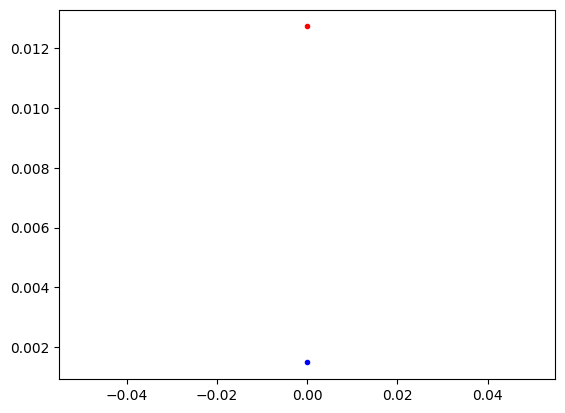

In [214]:
plt.plot(rp0_s.mean(),'.',color='blue',lw=1)
plt.plot(rp_s.mean(),'.',color='red',lw=1)

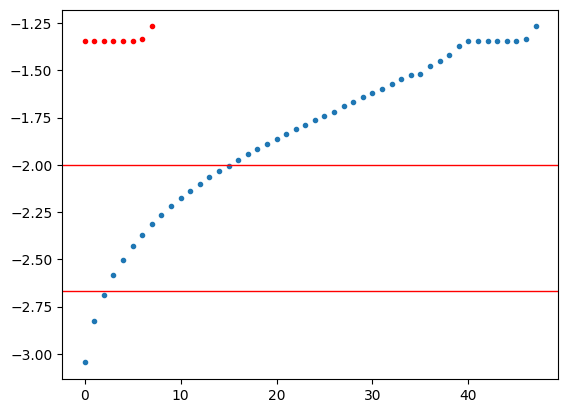

In [215]:
plt.plot(v_t[c_m],'.')
plt.plot(v_t[c_m0],'.',color='red')
plt.axhline(v_t[c_m0].mean()*1.5,color='red',lw=1)
plt.axhline(v_t[c_m0].mean()*2,color='red',lw=1)
# plt.axhline(v_t[c_p].min()+0.1,color='red',lw=1)


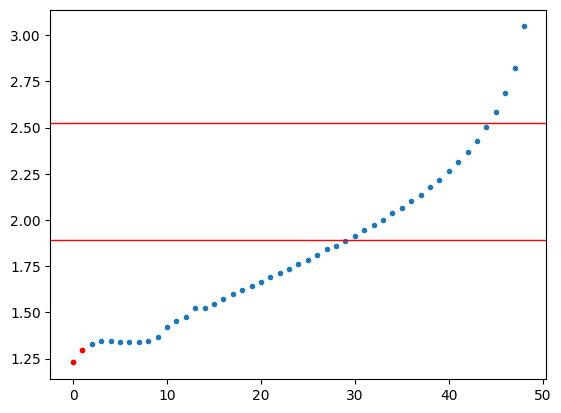

In [216]:
plt.plot(v_t[c_p],'.')
plt.plot(v_t[c_p0],'.',color='red')
plt.axhline(v_t[c_p0].mean()*1.5,color='red',lw=1)
plt.axhline(v_t[c_p0].mean()*2,color='red',lw=1)
# plt.axhline(v_t[c_p].min()+0.1,color='red',lw=1)


In [217]:
RP = np.array(list(RP_S.values()))
RM = np.array(list(RM_S.values()))
R0 = np.array(list(R0_S.values()))
M = np.array(list(vt_m.keys()))
VT = np.array(list(vt_m.values()))

Text(0.5, 1.0, 'K=9 N = 1000')

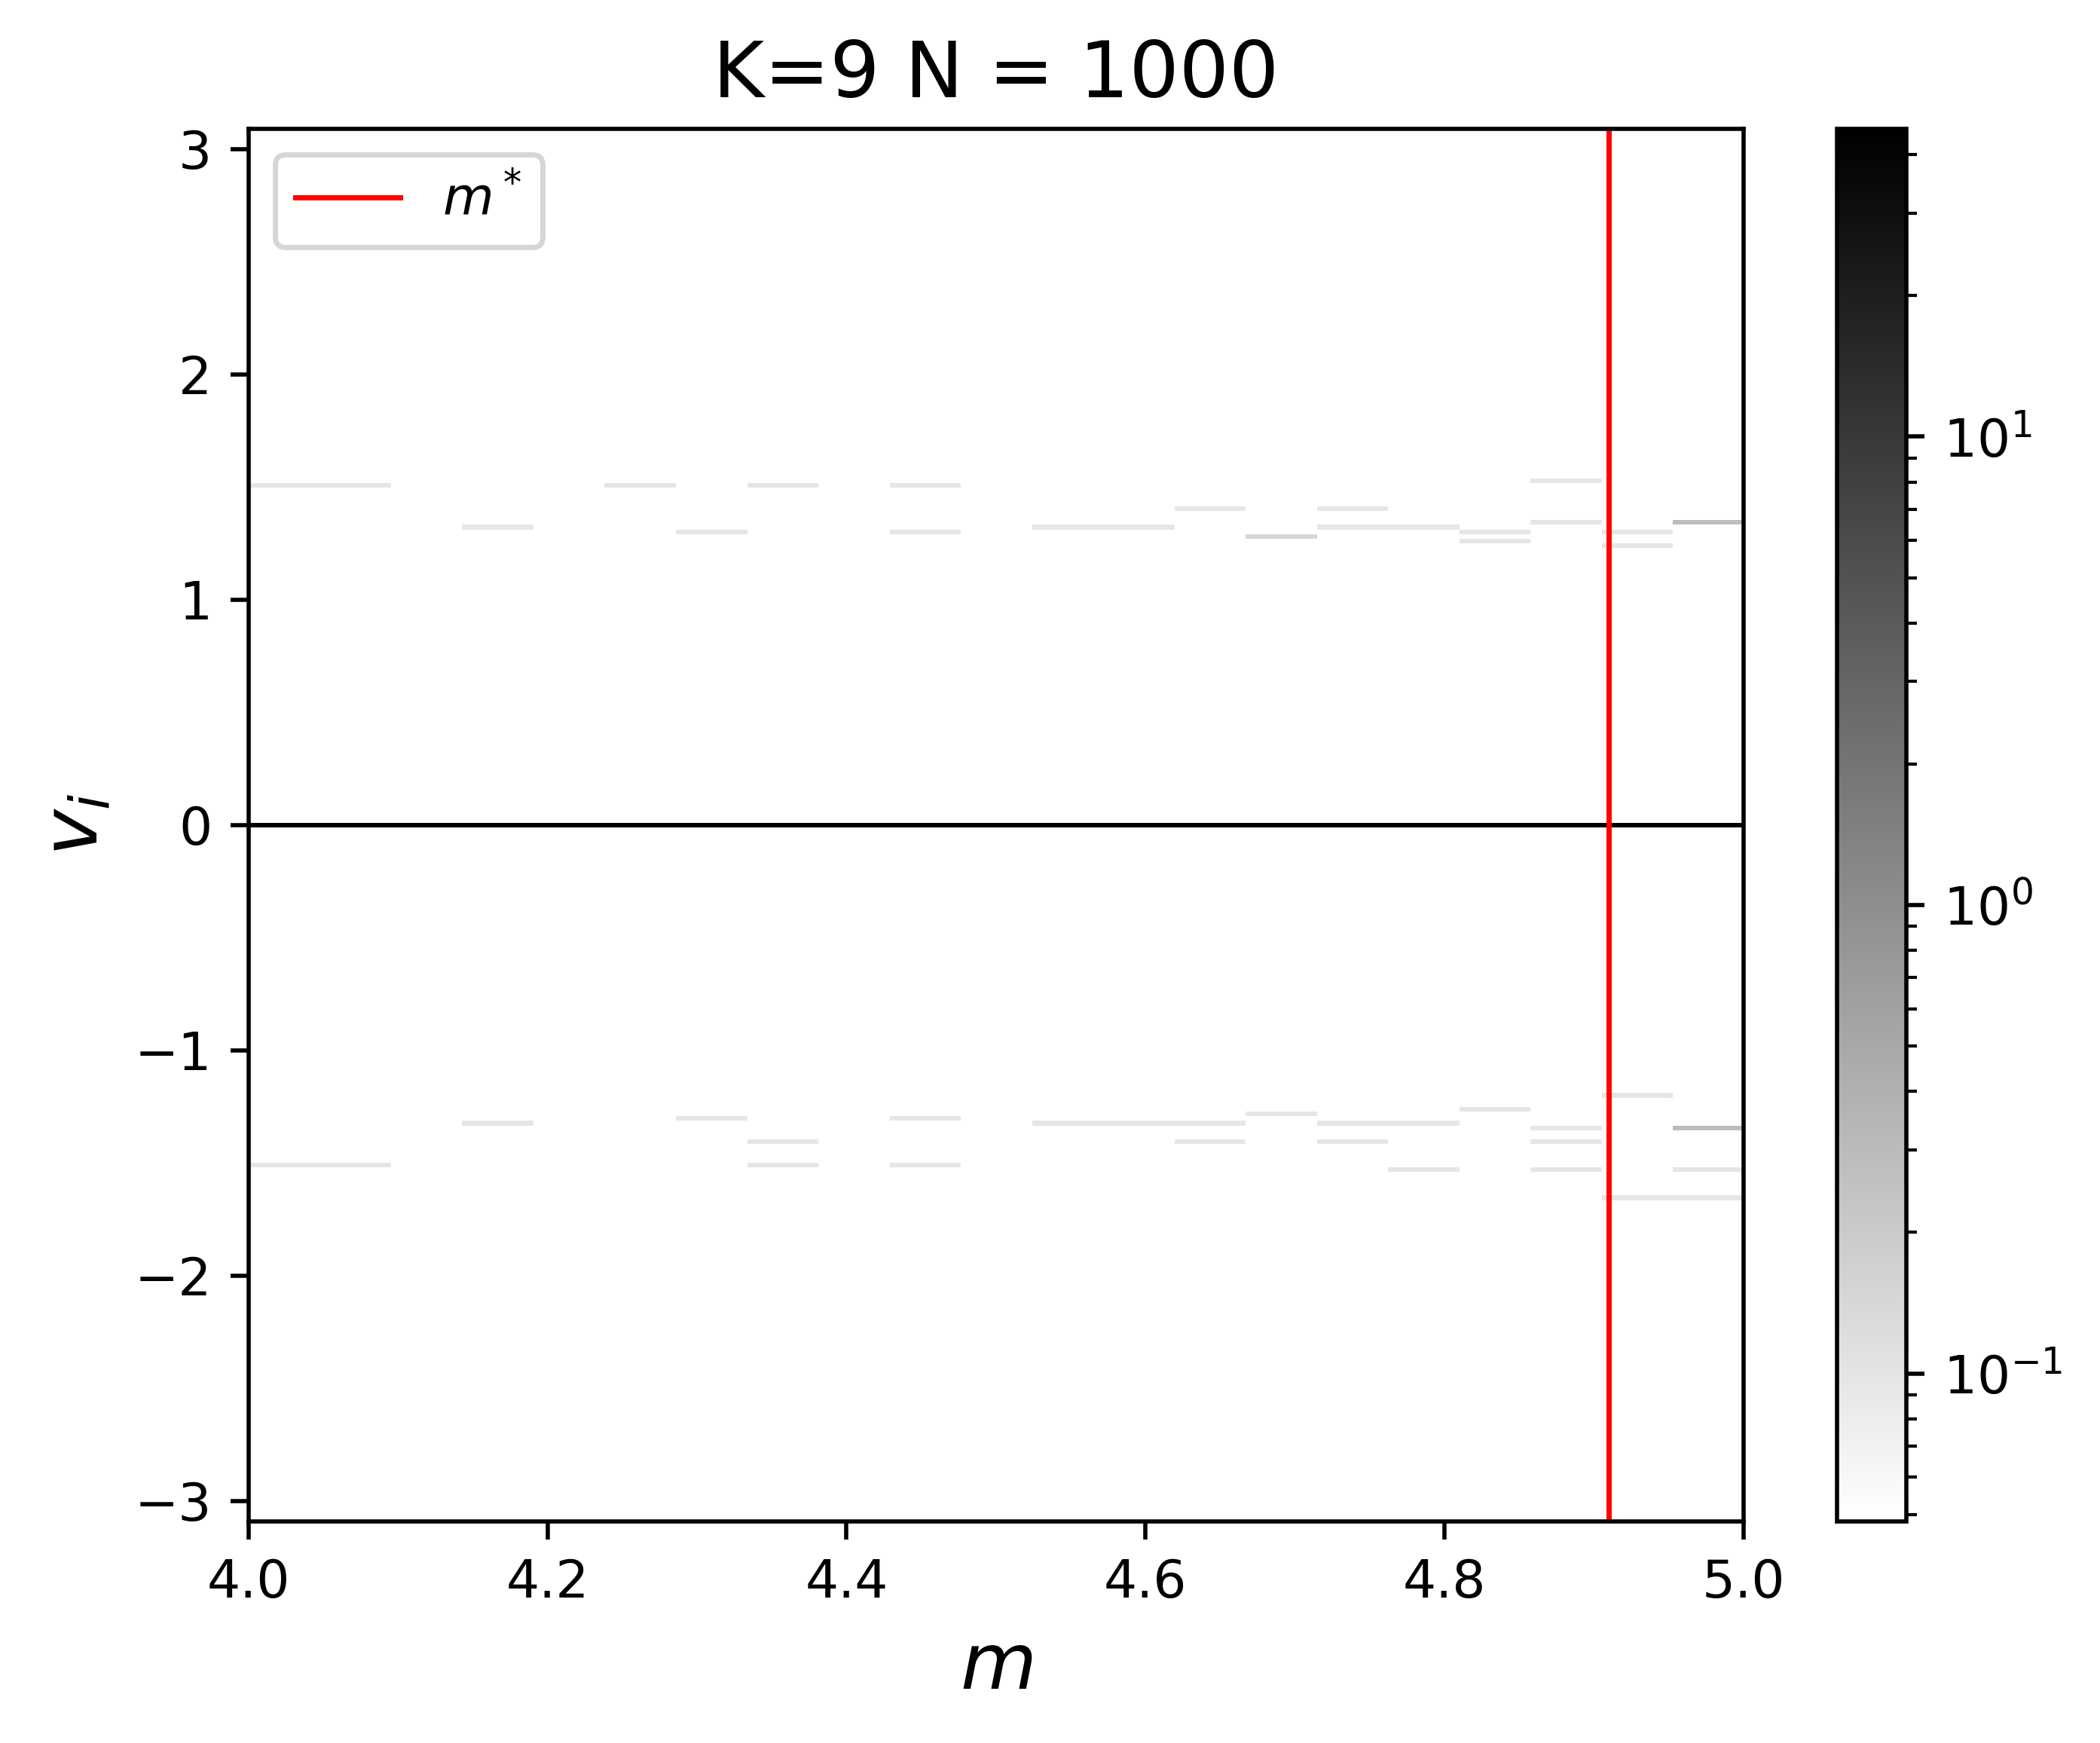

In [218]:
plt.figure(dpi=500)
O = np.linspace(omega.min(),omega.max(),300)
HS = []
for i, m in enumerate(M):
    h,_ = np.histogram(VT[i], bins=O,density=True)
    HS.append(h)
HS =np.array(HS)
from matplotlib.colors import LogNorm
plt.imshow(HS.T, norm=LogNorm(),extent=[M.min(),M.max(),O.min(),O.max()],cmap='gray_r')
plt.gca().set_aspect('auto')
plt.axvline(m_c,color='red',lw=1,label='$m^*$')
plt.colorbar()
plt.legend()
plt.ylabel('$v_i$',fontsize=15)
plt.xlabel('$m$',fontsize=15)
plt.title(f'K={K} N = {N}',fontsize=15)
# plt.xlabel('Velocity')
# plt.ylabel('Density')
# plt.title('Velocity Distribution for Different m Values')
# plt.legend()

Text(0.5, 1.0, 'K=9 N = 1000')

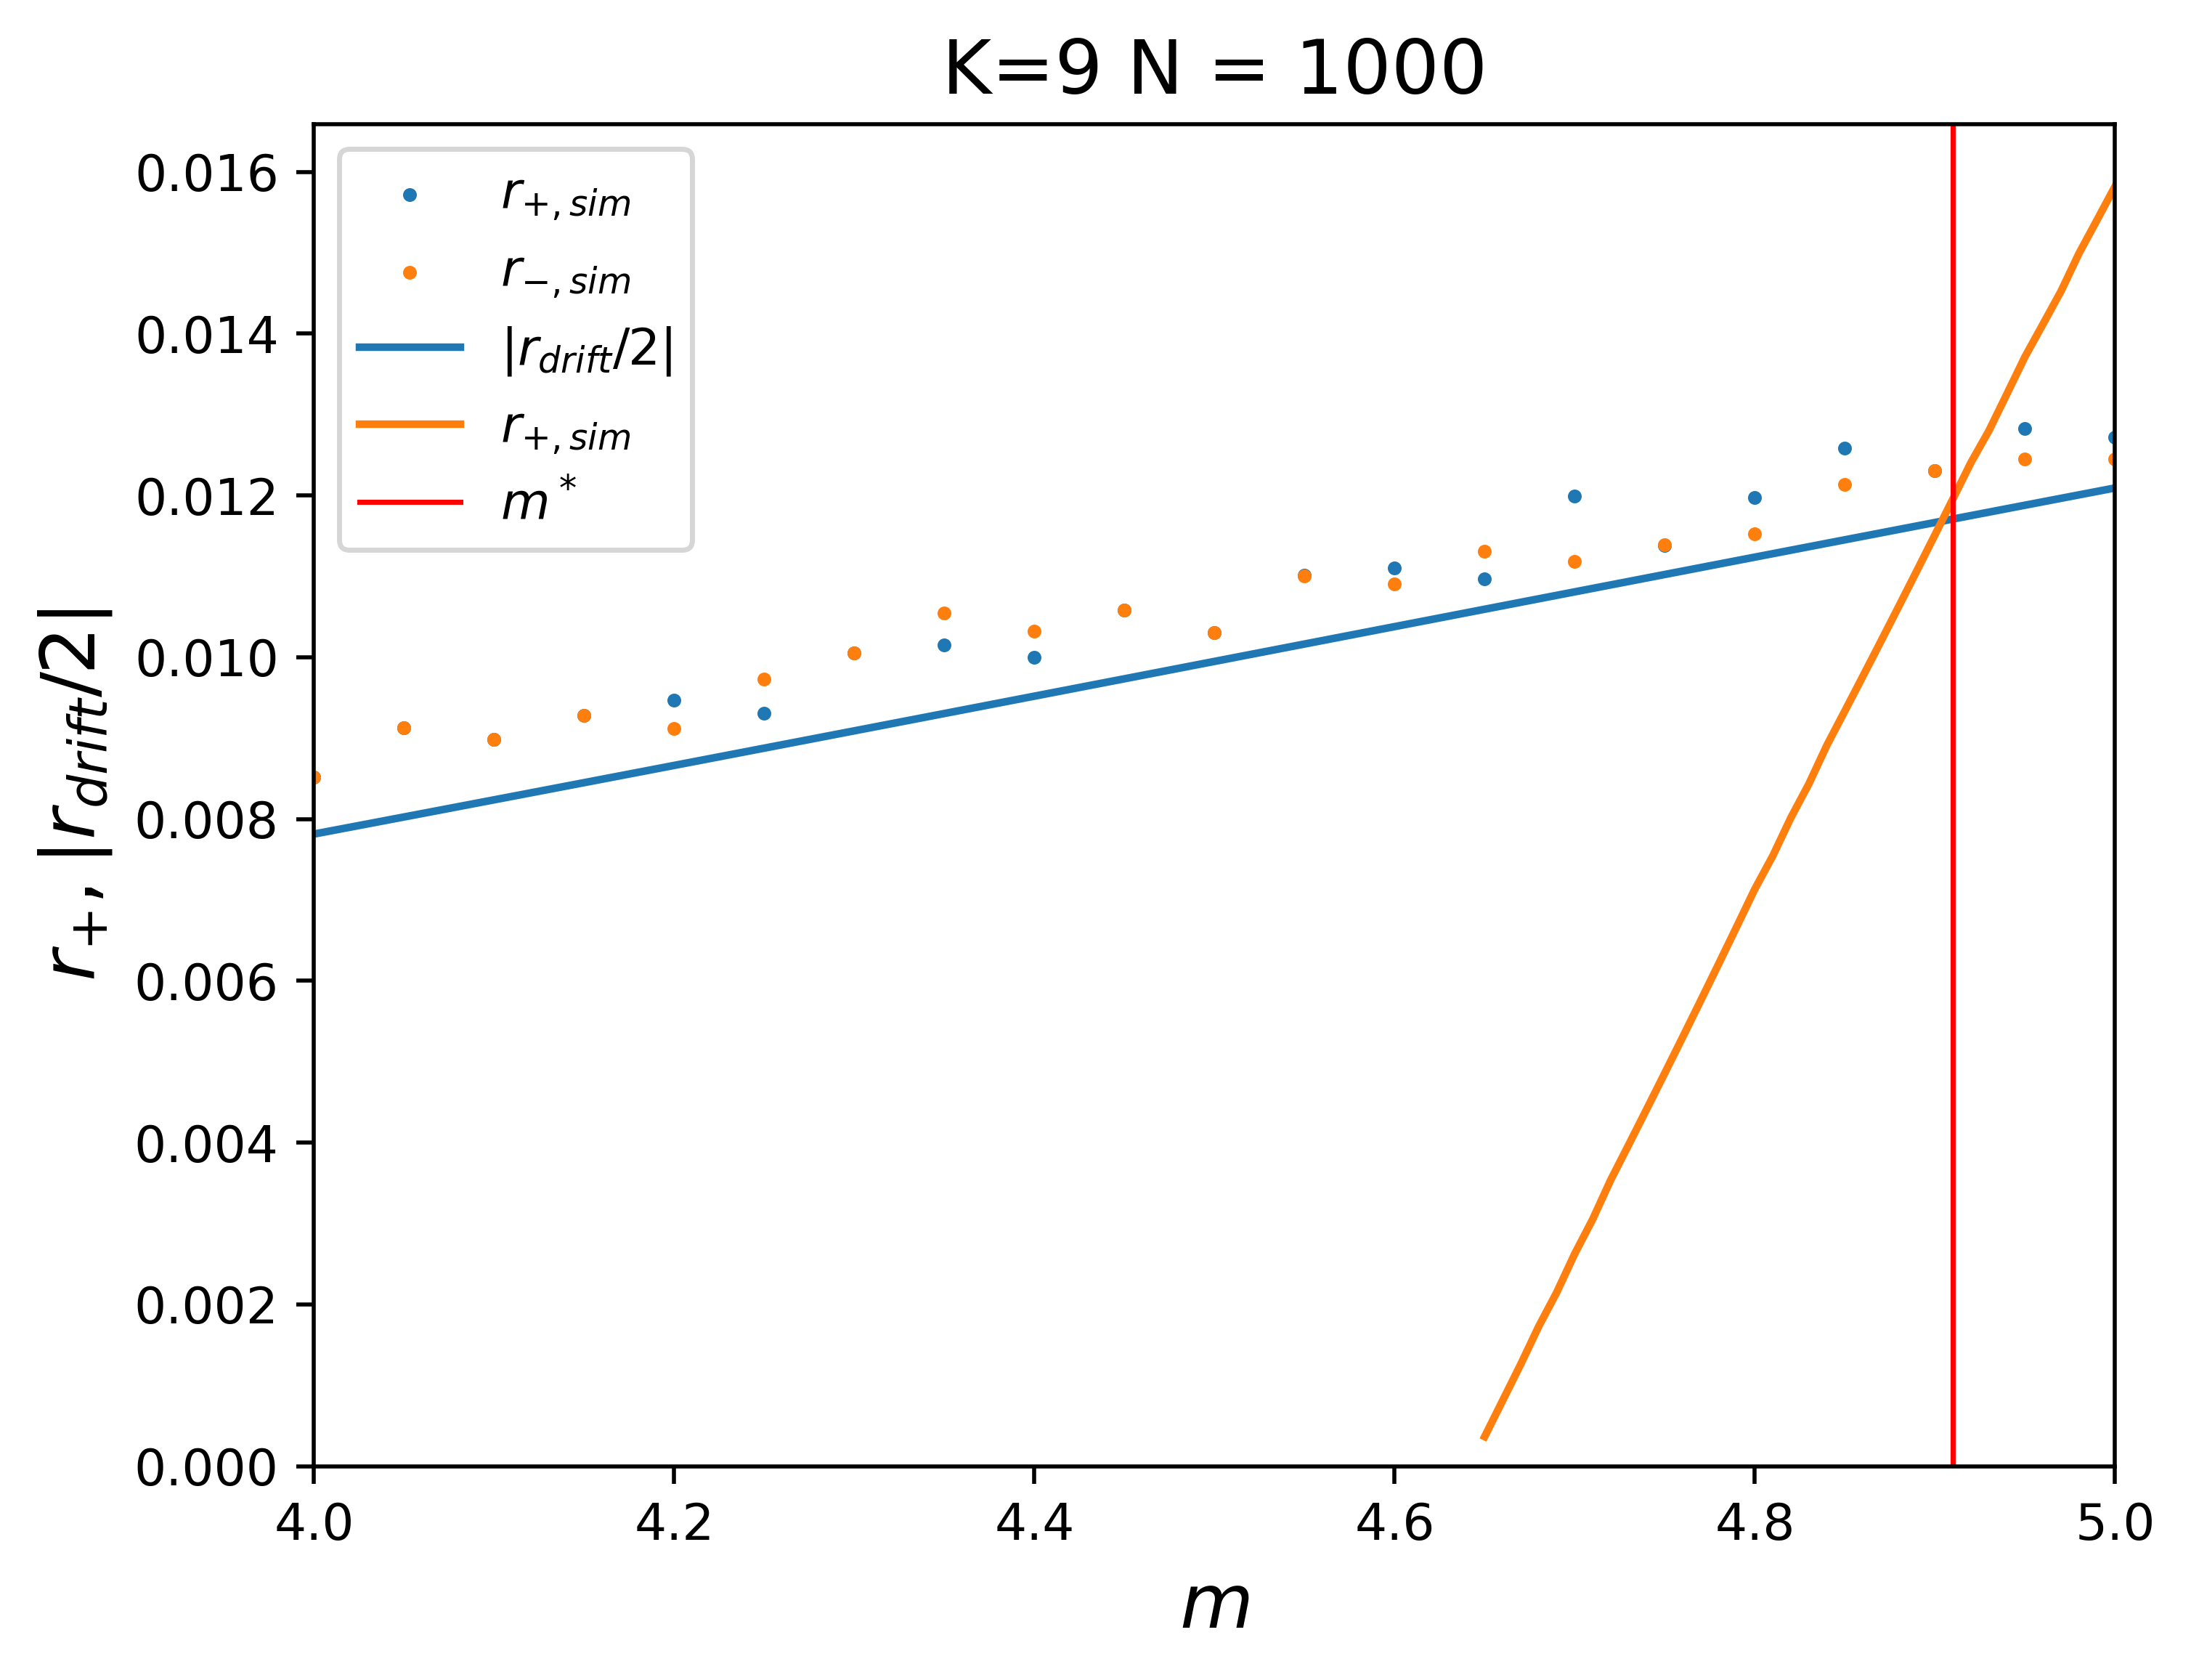

In [220]:
plt.figure(dpi=500)
plt.scatter(M,RP,s=3,label='$r_{+,sim}$')
plt.scatter(M,RM,s=3,label='$r_{-,sim}$')
# plt.scatter(M,R0,s=1)

# plt.plot(ms,A_rM)
# plt.plot(ms,A_r0)
plt.plot(ms,-A_r_d/2,label='$|r_{drift}/2|$')
plt.plot(ms,A_rp,label='$r_{+,sim}$')
# plt.plot(ms,A_rp0)
plt.axvline(m_c,color='red',lw=1,label='$m^*$')

plt.legend()
plt.xlim(4,5)
plt.ylim(0,)
plt.xlabel('$m$',fontsize=15)
plt.ylabel('$r_{+},|r_{drift}/2|$',fontsize=15)
plt.title(f'K={K} N = {N}',fontsize=15)
# plt.plot(ms,A_sigma)
# plt.plot(ms,A_ops)

# $m^*$

In [11]:
mcs = np.load('mc_Normal.npz',allow_pickle=True )

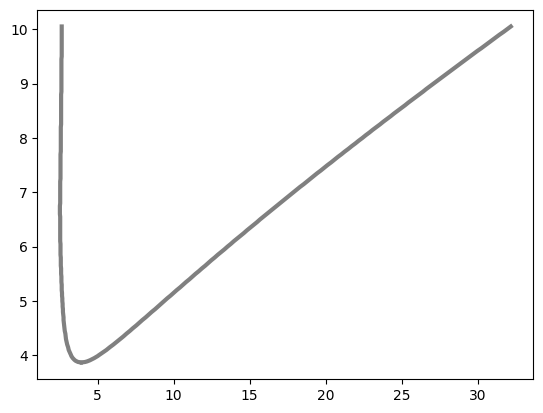

In [138]:
plt.plot(mcs['mc_Kd'],mcs['mc_d'],color='gray',lw=3)
plt.plot(mcs['mc_Ku'],mcs['mc_u'],color='gray',lw=3)

In [64]:
# 저장된 npz 파일 로드
loaded_data = np.load('Simul/RR.npz', allow_pickle=True)
# 딕셔너리로 변환
RR = dict(loaded_data['RR'].item())  # .item()을 사용해 원래 딕셔너리로 변환

Ks = np.arange(0,10.01,0.1)
ms = np.arange(0,10.02,0.1)
KK,MM = np.meshgrid(Ks,ms,indexing='ij')

In [3]:
df = pd.DataFrame(RR)

In [5]:
N = 5000
df_new = pd.read_excel(f'N = {N} seed = 10 QNORMAL wo pv.xlsm',index_col=[0,1])

In [9]:
A_RPU = pd.DataFrame(df['u']['rp'],index=Ks).to_numpy(dtype=float)
A_RPD = pd.DataFrame(df['d']['rp'],index=Ks).to_numpy(dtype=float)
A_RPU0 = pd.DataFrame(df['u']['rp0'],index=Ks).to_numpy(dtype=float)
A_RPD0 = pd.DataFrame(df['d']['rp0'],index=Ks).to_numpy(dtype=float)
A_RM = pd.DataFrame(df['u']['R'],index=Ks).to_numpy(dtype=float)
A_R0 = pd.DataFrame(df['u']['R0'],index=Ks).to_numpy(dtype=float)
A_SIG = pd.DataFrame(df['u']['SIG'],index=Ks).to_numpy(dtype=float)
A_RDrH = (A_R0 - A_RM)/2

RP = df_new['r+'].unstack().to_numpy(float)
RPT = df_new['r+_total'].unstack().to_numpy(float)
R0 = df_new['r0'].unstack().to_numpy(float)
RM = df_new['r-'].unstack().to_numpy(float)
RMT = df_new['r-_total'].unstack().to_numpy(float)
SIG_S = df_new['sig'].unstack().to_numpy(float)

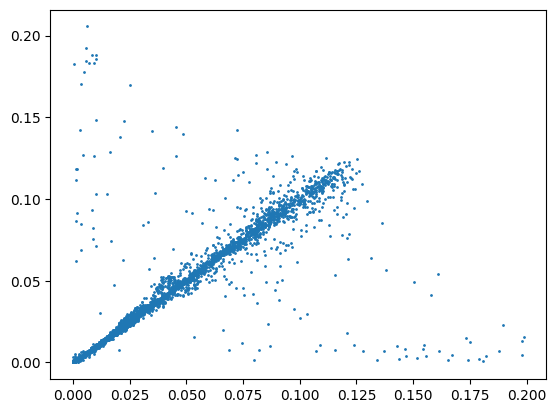

In [30]:
plt.scatter(abs((A_RDrH.T-RMT.T).flatten()),abs((A_RDrH.T-RPT.T).flatten()),s=1)


Text(0, 0.5, '$m$')

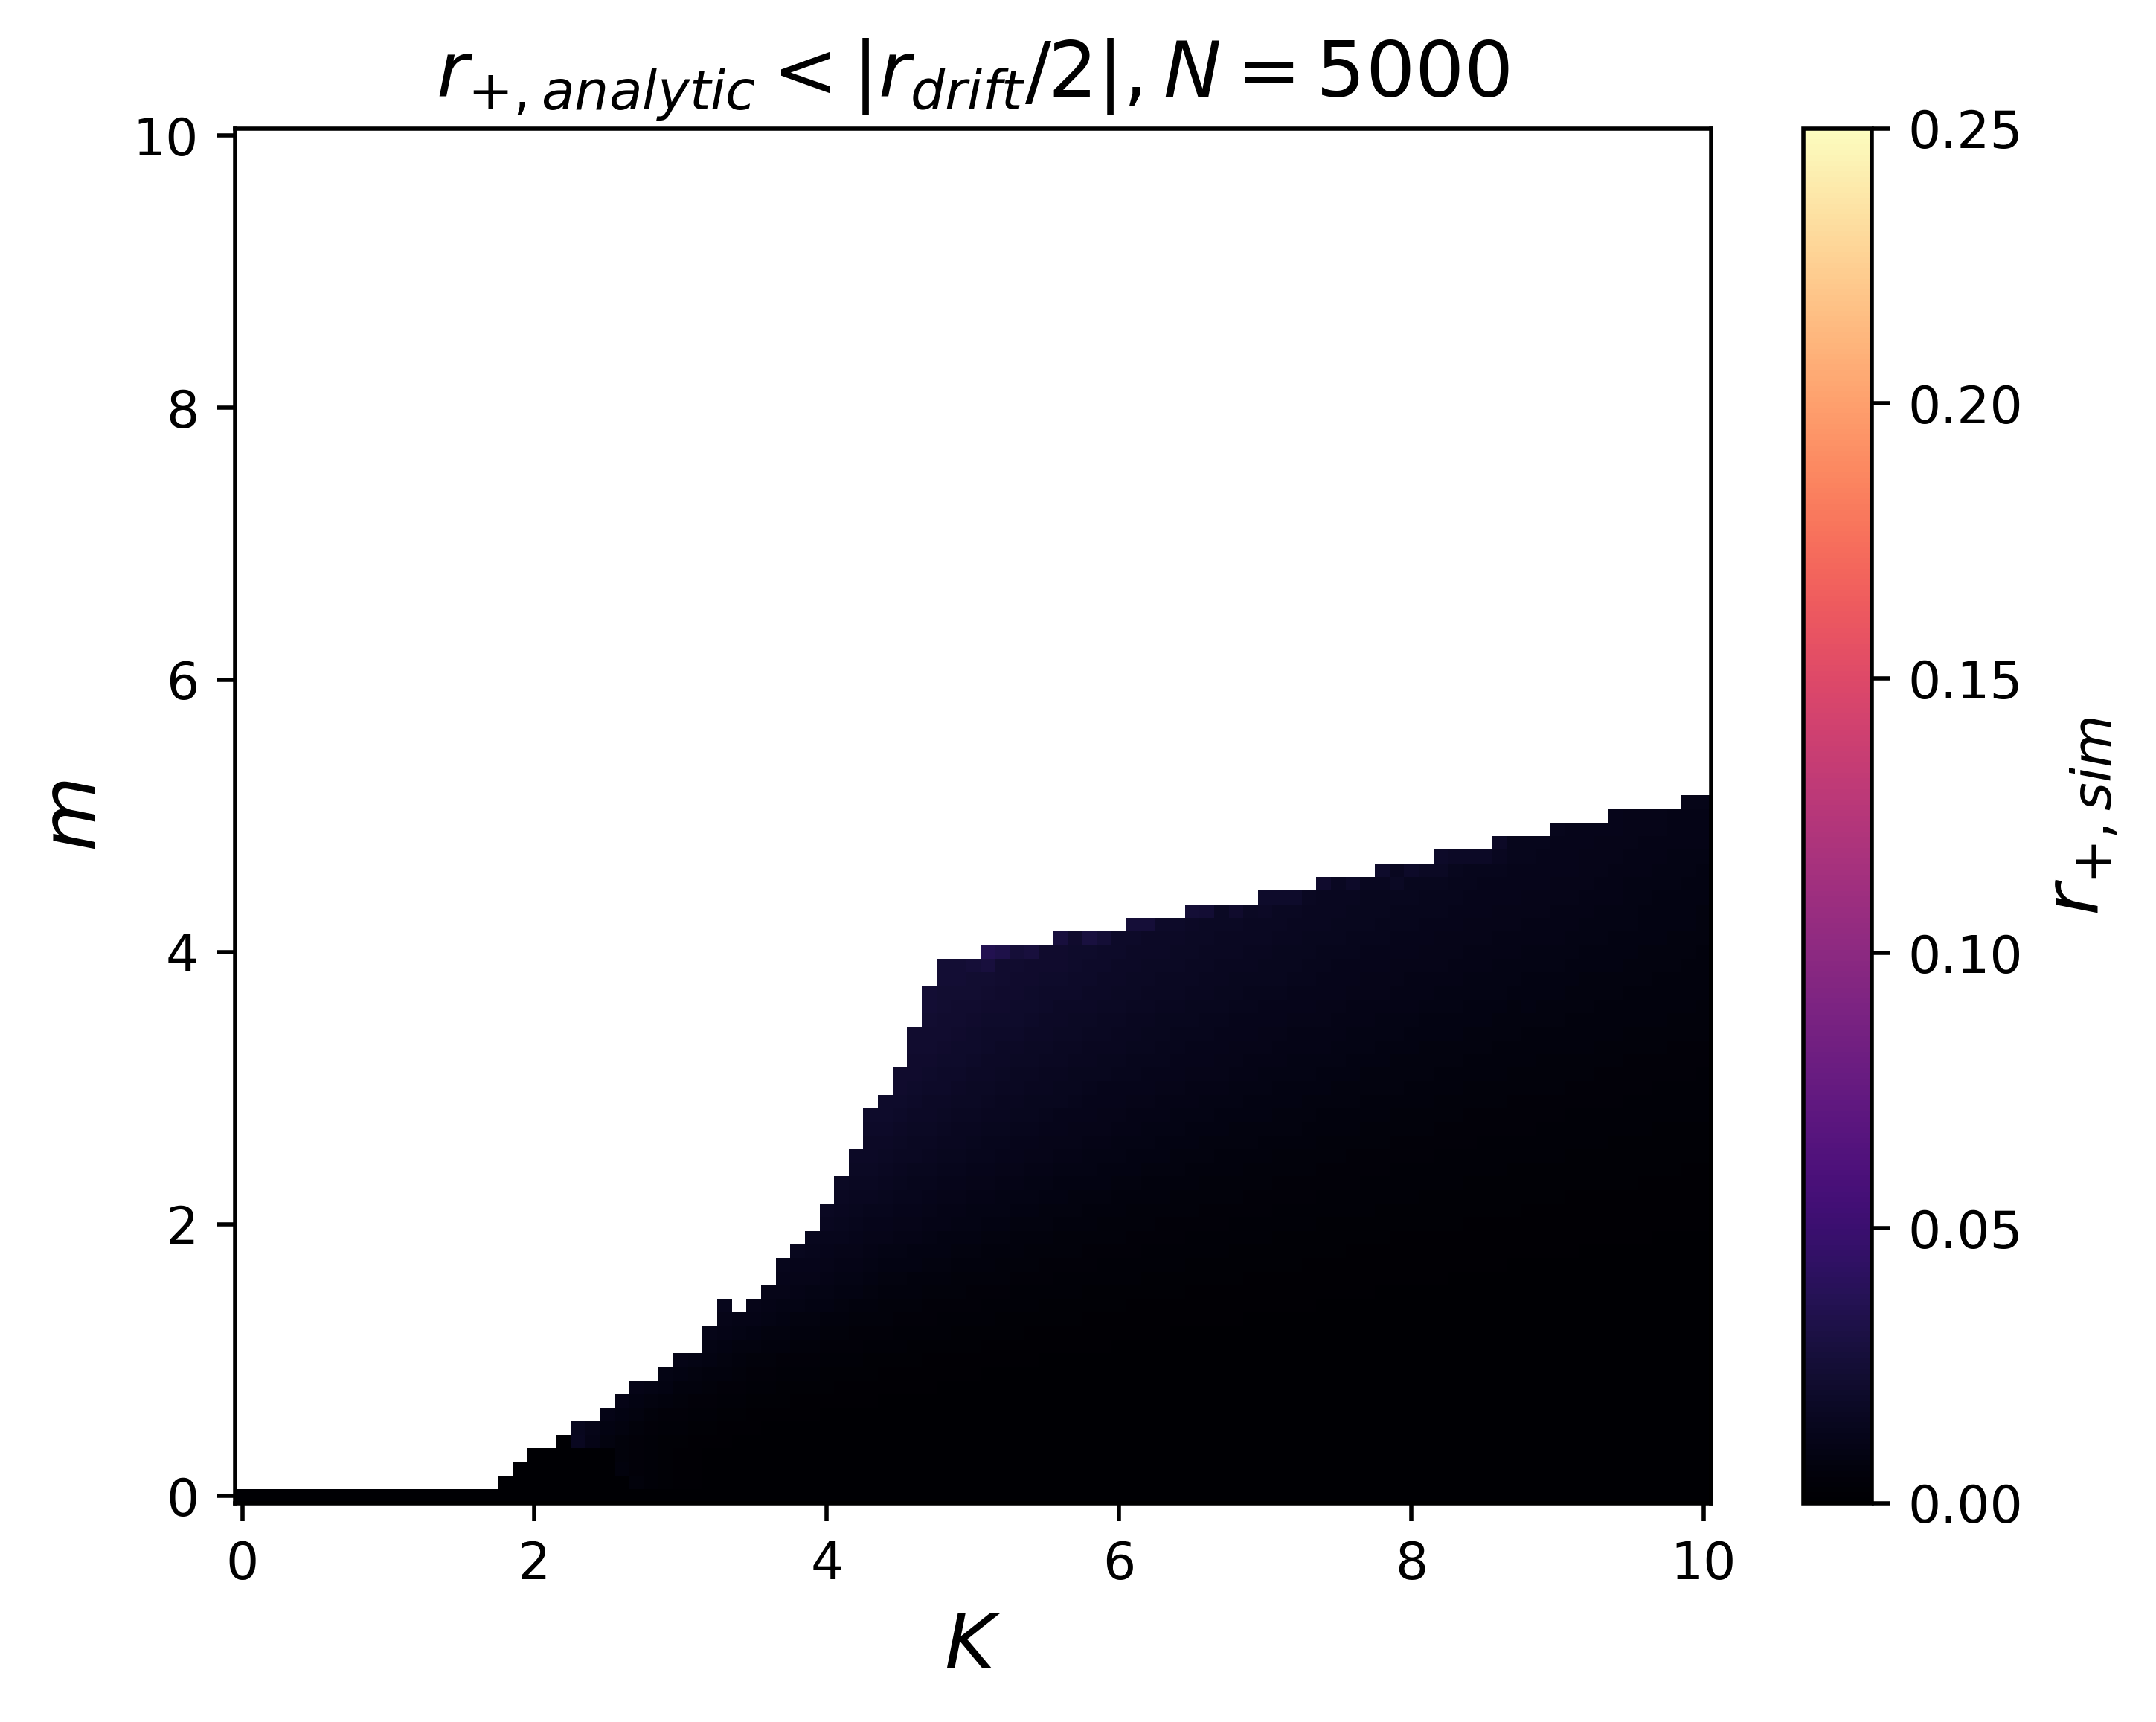

In [126]:
plt.figure(dpi=500)
X = np.isnan(A_RPU)
Y = A_RPU>=A_RDrH
Z = np.isnan(R0)
plt.pcolormesh(KK,MM,np.where(~Z&~Y,RPT,np.nan),cmap='magma',vmin=0,vmax=0.25)
cbar = plt.colorbar(label=r'$r_{+,sim}$')
# cbar.ax.tick_params(labelsize=12)  # Adjust the font size of the colorbar ticks
cbar.set_label(r'$r_{+,sim}$', fontsize=15)  # Set the font size of the colorbar label
# plt.title(r'$r_{0,sim}>0.1$',fontsize=15)
plt.title(r'$r_{+,analytic}<|r_{drift}/2|,N = {5000}$',fontsize=15)

plt.xlabel('$K$',fontsize=15)
plt.ylabel('$m$',fontsize=15)


Text(0.5, 1.0, '$r_{+,analytic}<|r_{drift}/2|,N = {5000}$')

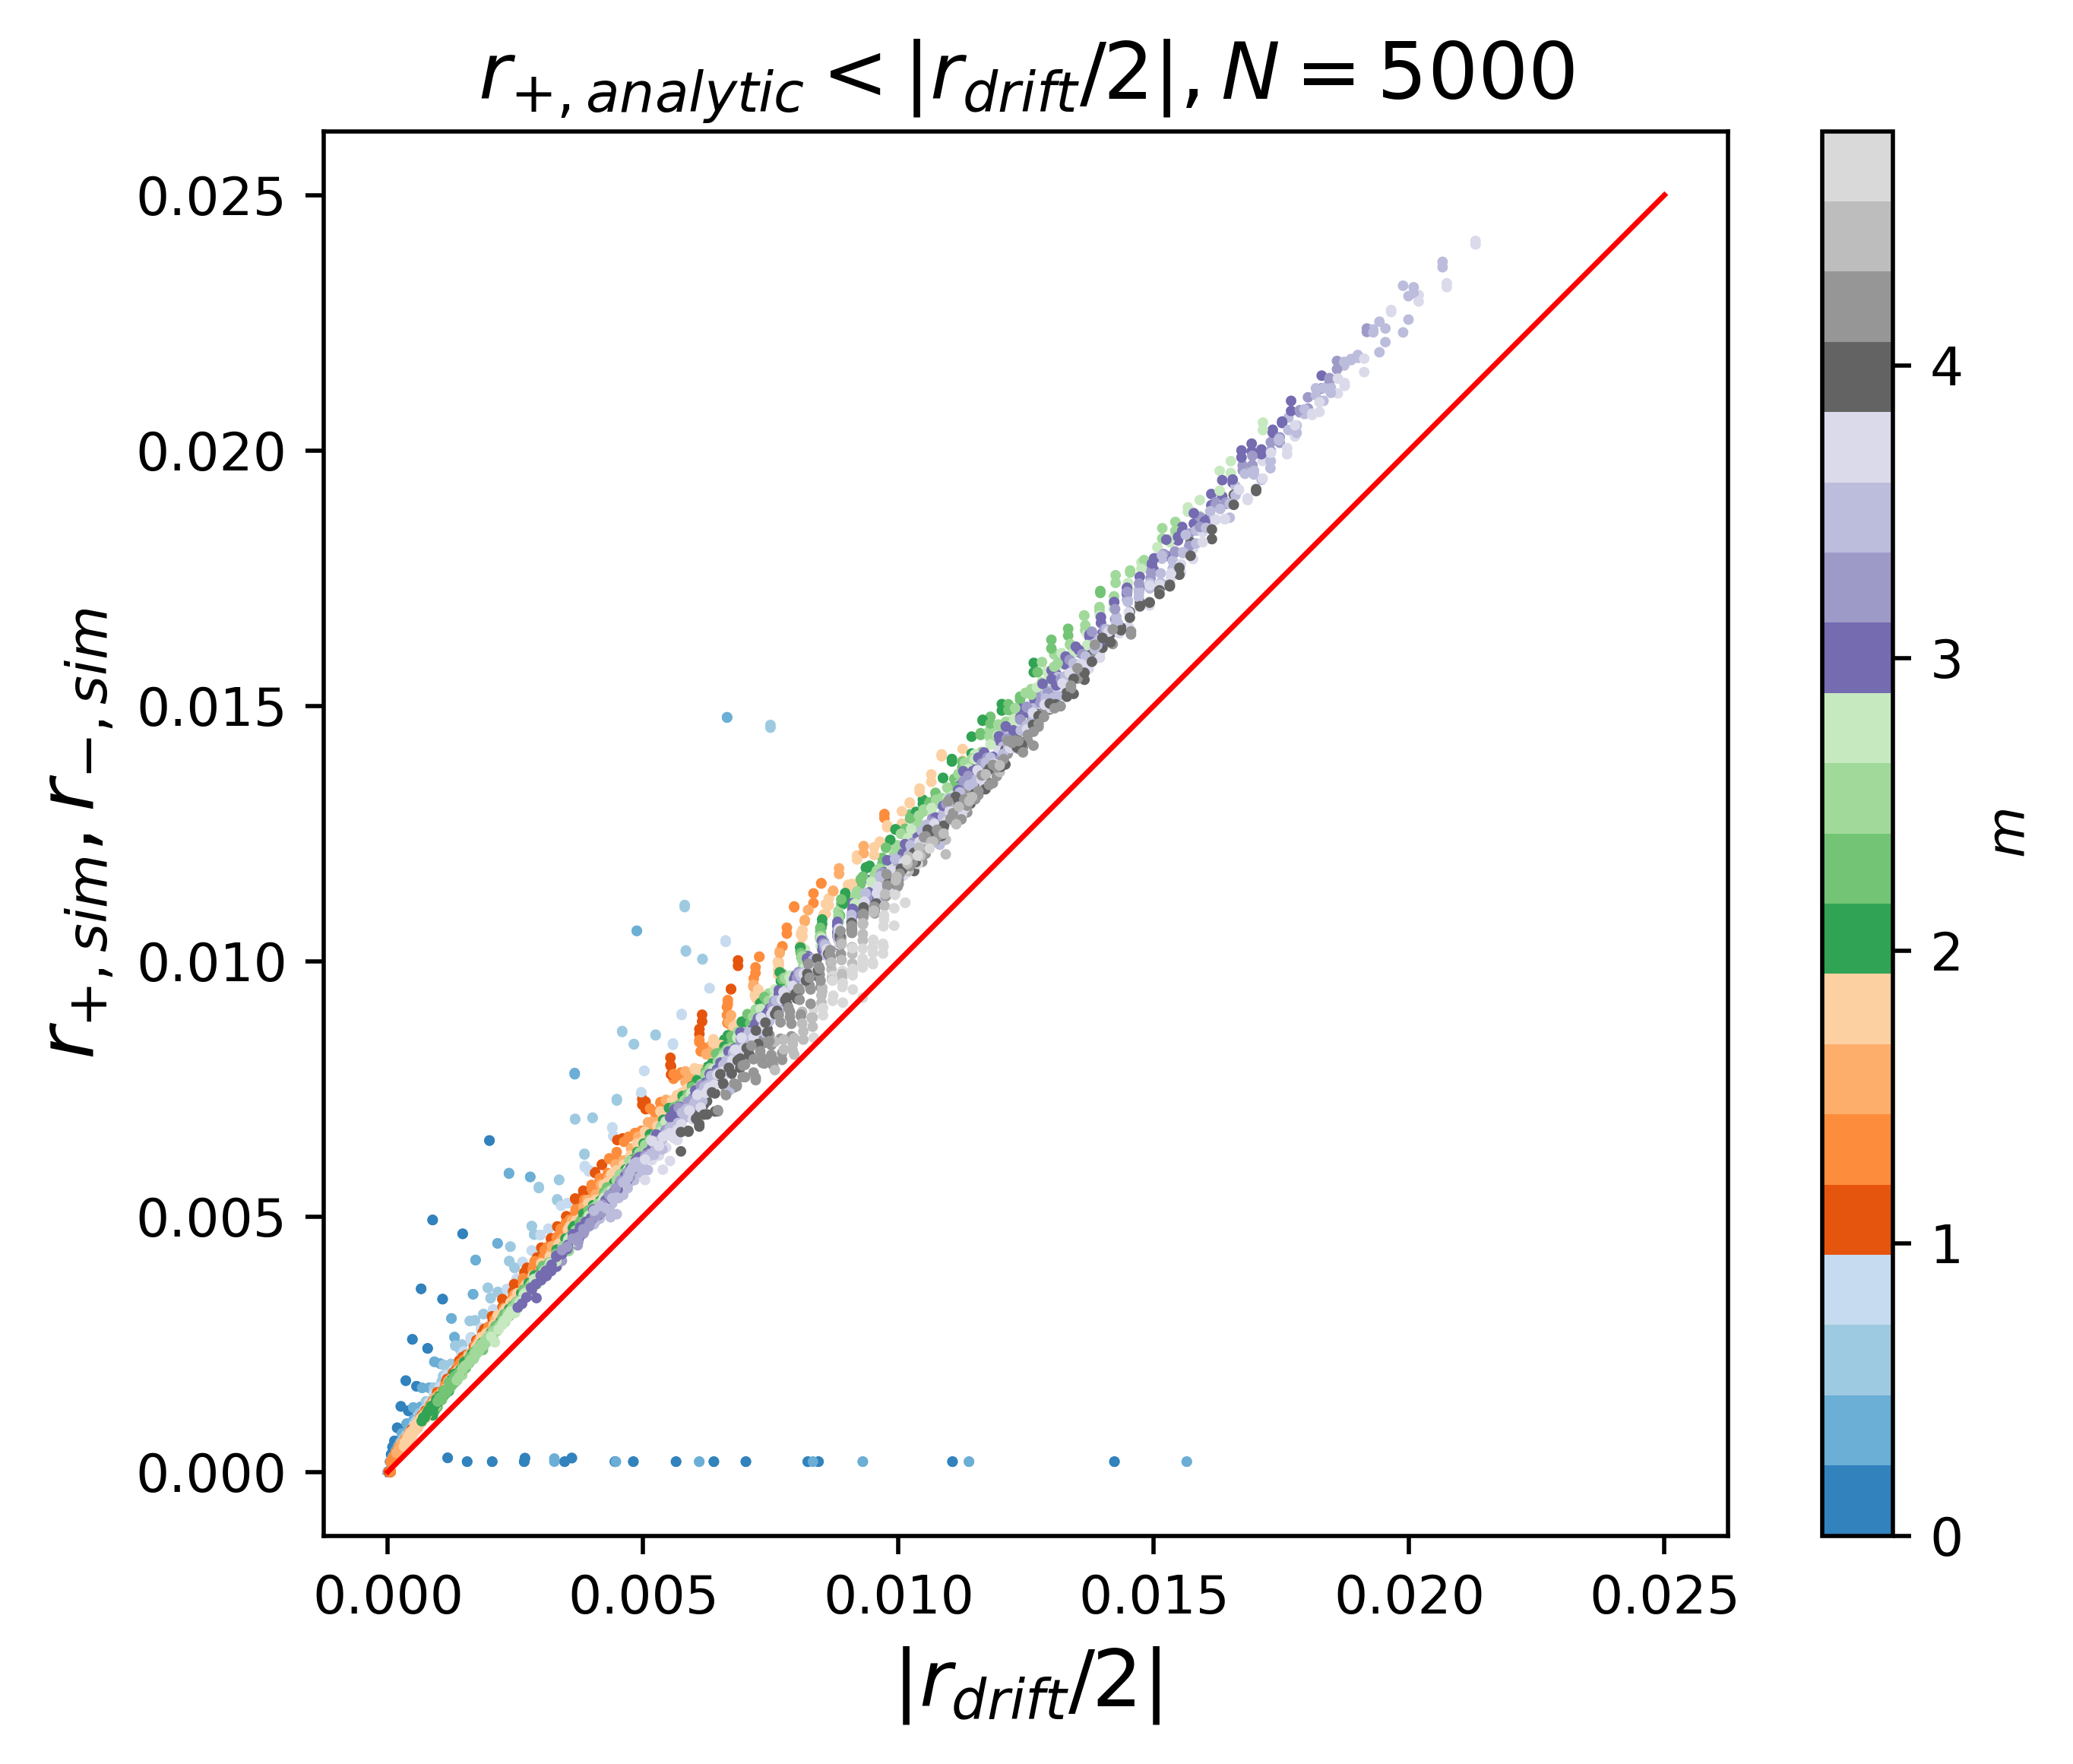

In [ ]:
plt.figure(dpi=500)
plt.scatter(A_RDrH[X&~Y&~Z].T.flatten(),((RMT)[X&~Y&~Z]).T.flatten(),c=MM[X&~Y&~Z].T,s=1,cmap='tab20c')
plt.scatter(A_RDrH[X&~Y&~Z].T.flatten(),((RPT)[X&~Y&~Z]).T.flatten(),c=MM[X&~Y&~Z].T,s=1,cmap='tab20c')
# plt.ylim(-0.02,0.02)
plt.plot([0,0.025],[0,0.025],color='red',lw=1)
# plt.ylim(0, np.nanmax(A_RDrH[X&~Y&~Z].T.flatten()))
# plt.xlim(0, np.nanmax(A_RDrH[X&~Y&~Z].T.flatten()))
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(label='$m$')
plt.xlabel('$|r_{drift}/2|$',fontsize=15)
plt.ylabel('$r_{+,sim},r_{-,sim}$',fontsize=15)
plt.title(r'$r_{+,analytic}<|r_{drift}/2|,N = {5000}$',fontsize=15)

Text(0.5, 1.0, '$r_{+,analytic}>|r_{drift}/2|,N = {5000}$')

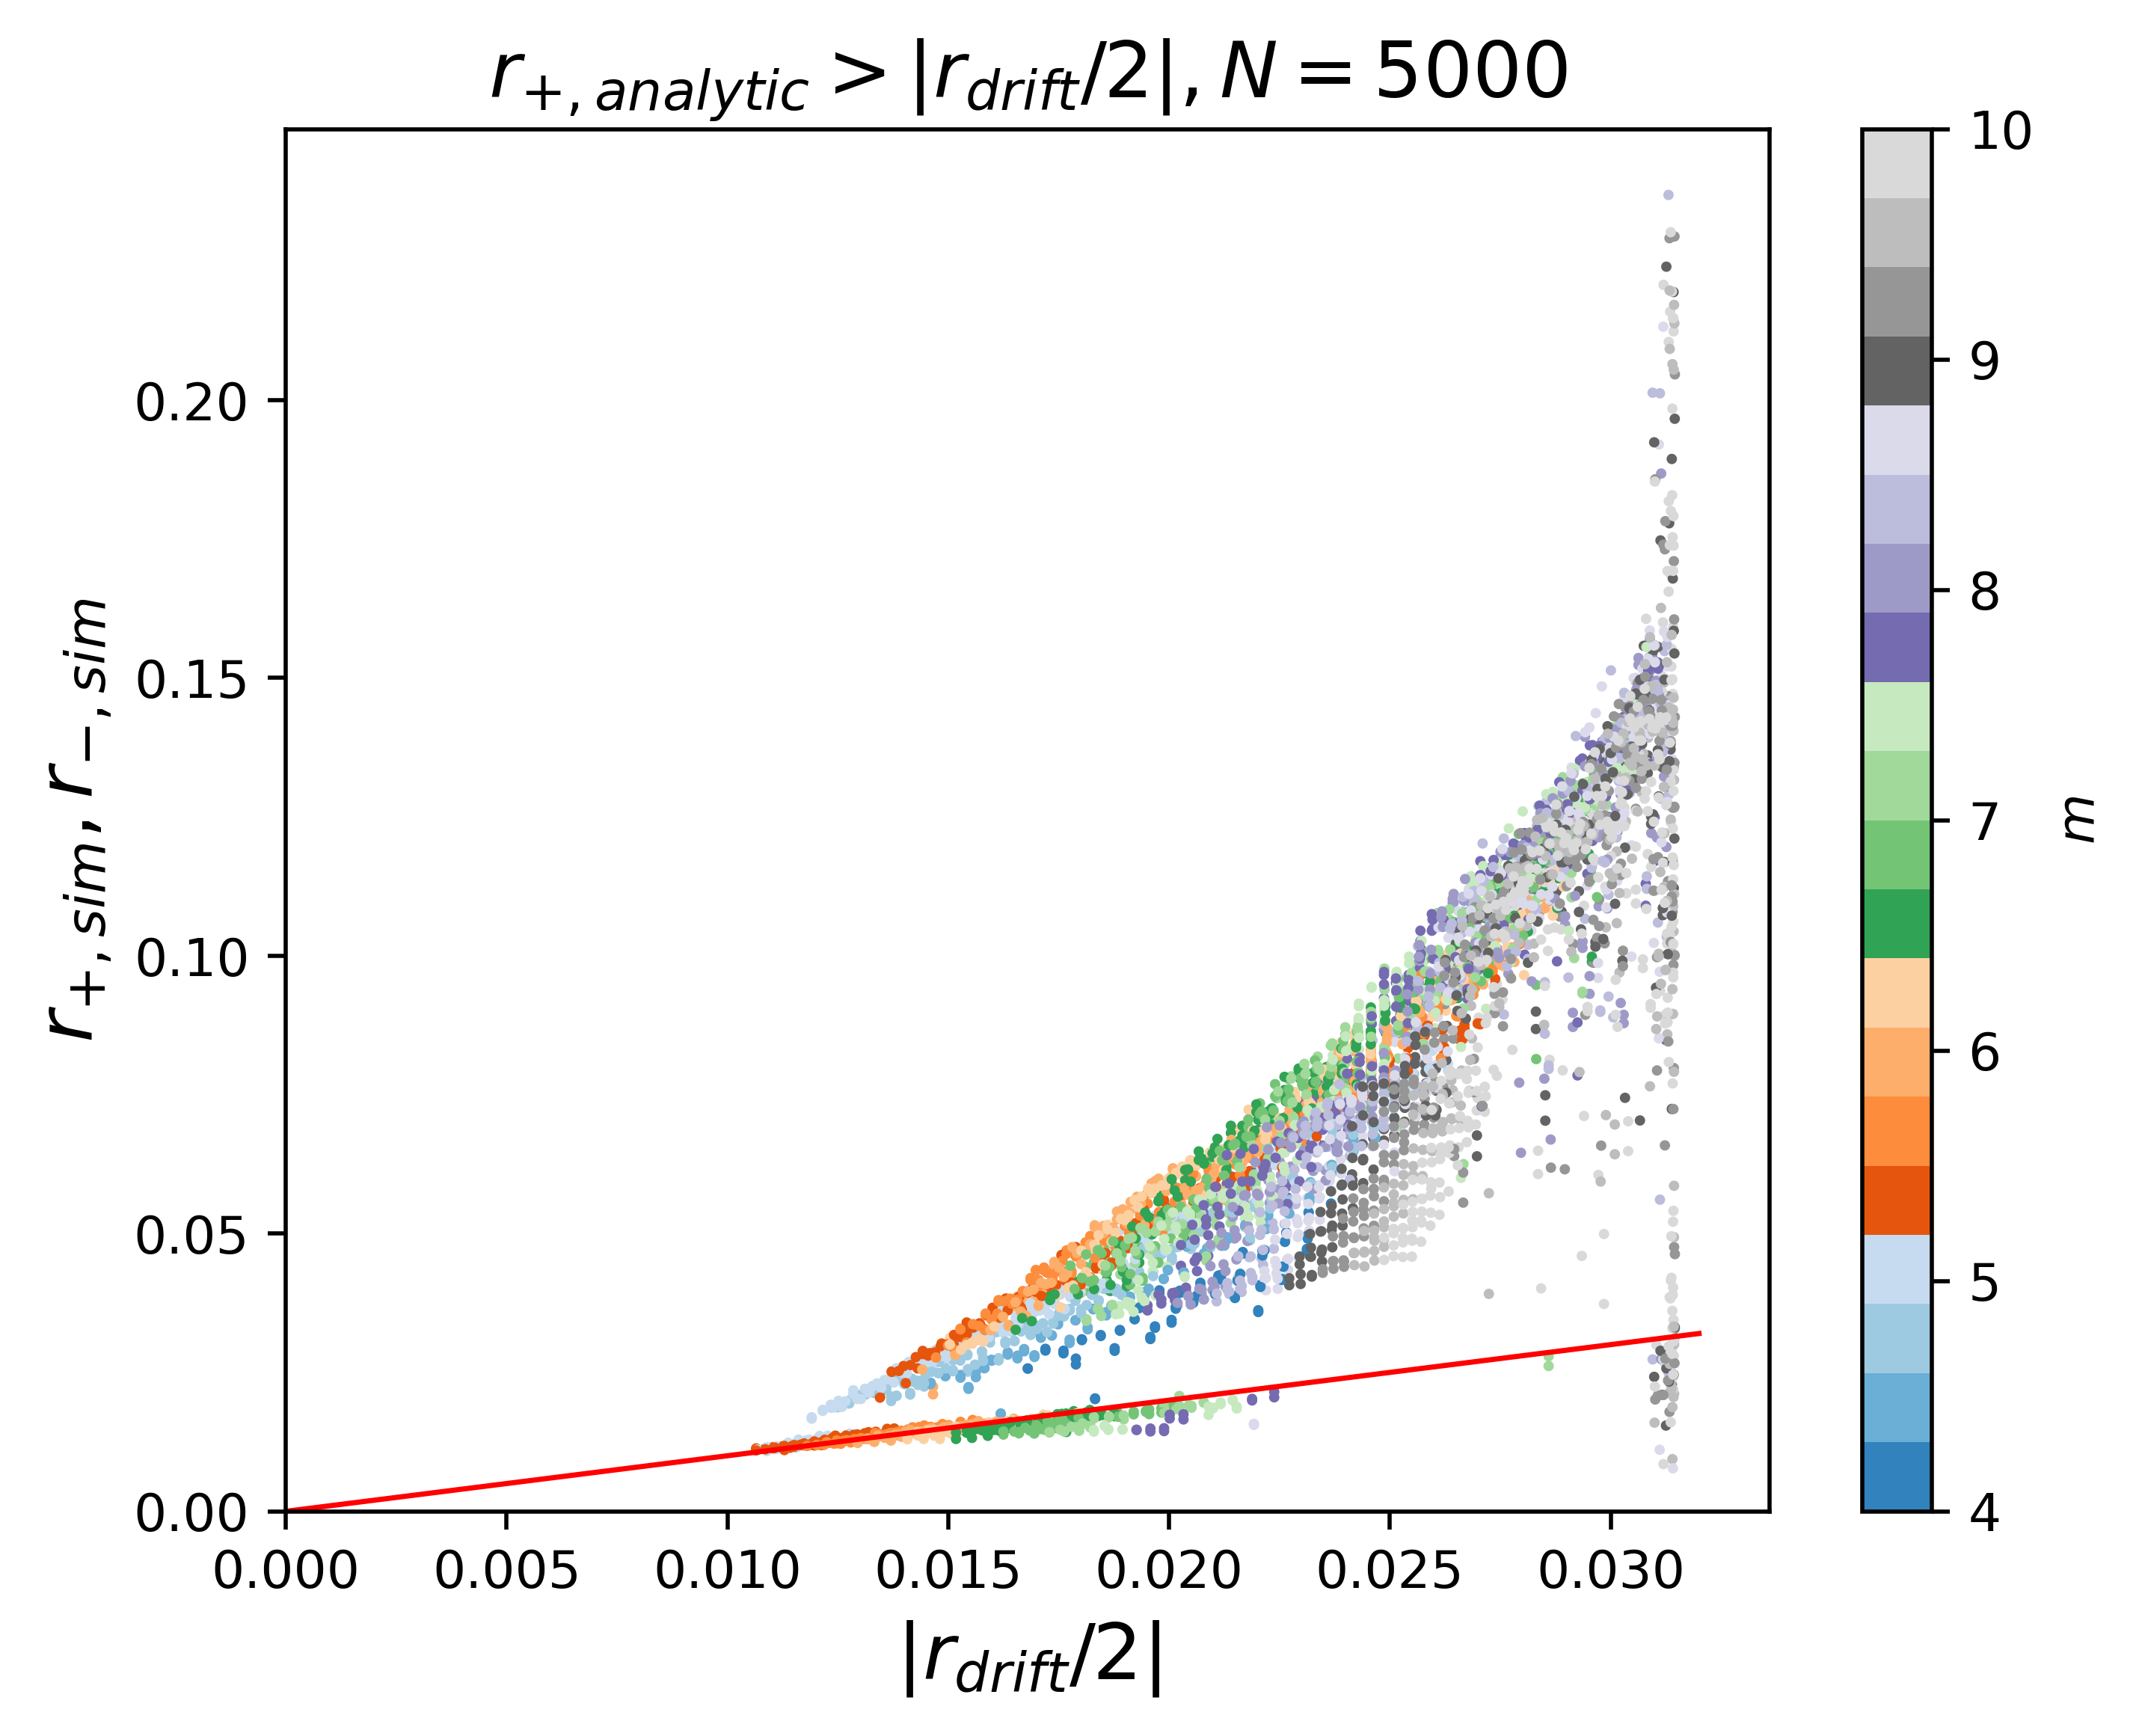

In [106]:
plt.figure(dpi=500)

plt.scatter(A_RDrH[Y&~Z].T.flatten(),((RMT)[Y&~Z]).T.flatten(),c=MM[Y&~Z].T,s=1,cmap='tab20c')
plt.scatter(A_RDrH[Y&~Z].T.flatten(),((RPT)[Y&~Z]).T.flatten(),c=MM[Y&~Z].T,s=1,cmap='tab20c')
# plt.ylim(-0.02,0.02)
plt.plot([0,0.032],[0,0.032],color='red',lw=1)
plt.ylim(0,)# np.nanmax(A_RDrH[Y&~Z].T.flatten()))
plt.xlim(0,)# np.nanmax(A_RDrH[Y&~Z].T.flatten()))
plt.gca().set_aspect('auto', adjustable='box')
plt.colorbar(label='$m$')
plt.xlabel('$|r_{drift}/2|$',fontsize=15)
plt.ylabel('$r_{+,sim},r_{-,sim}$',fontsize=15)
plt.title(r'$r_{+,analytic}>|r_{drift}/2|,N = {5000}$',fontsize=15)

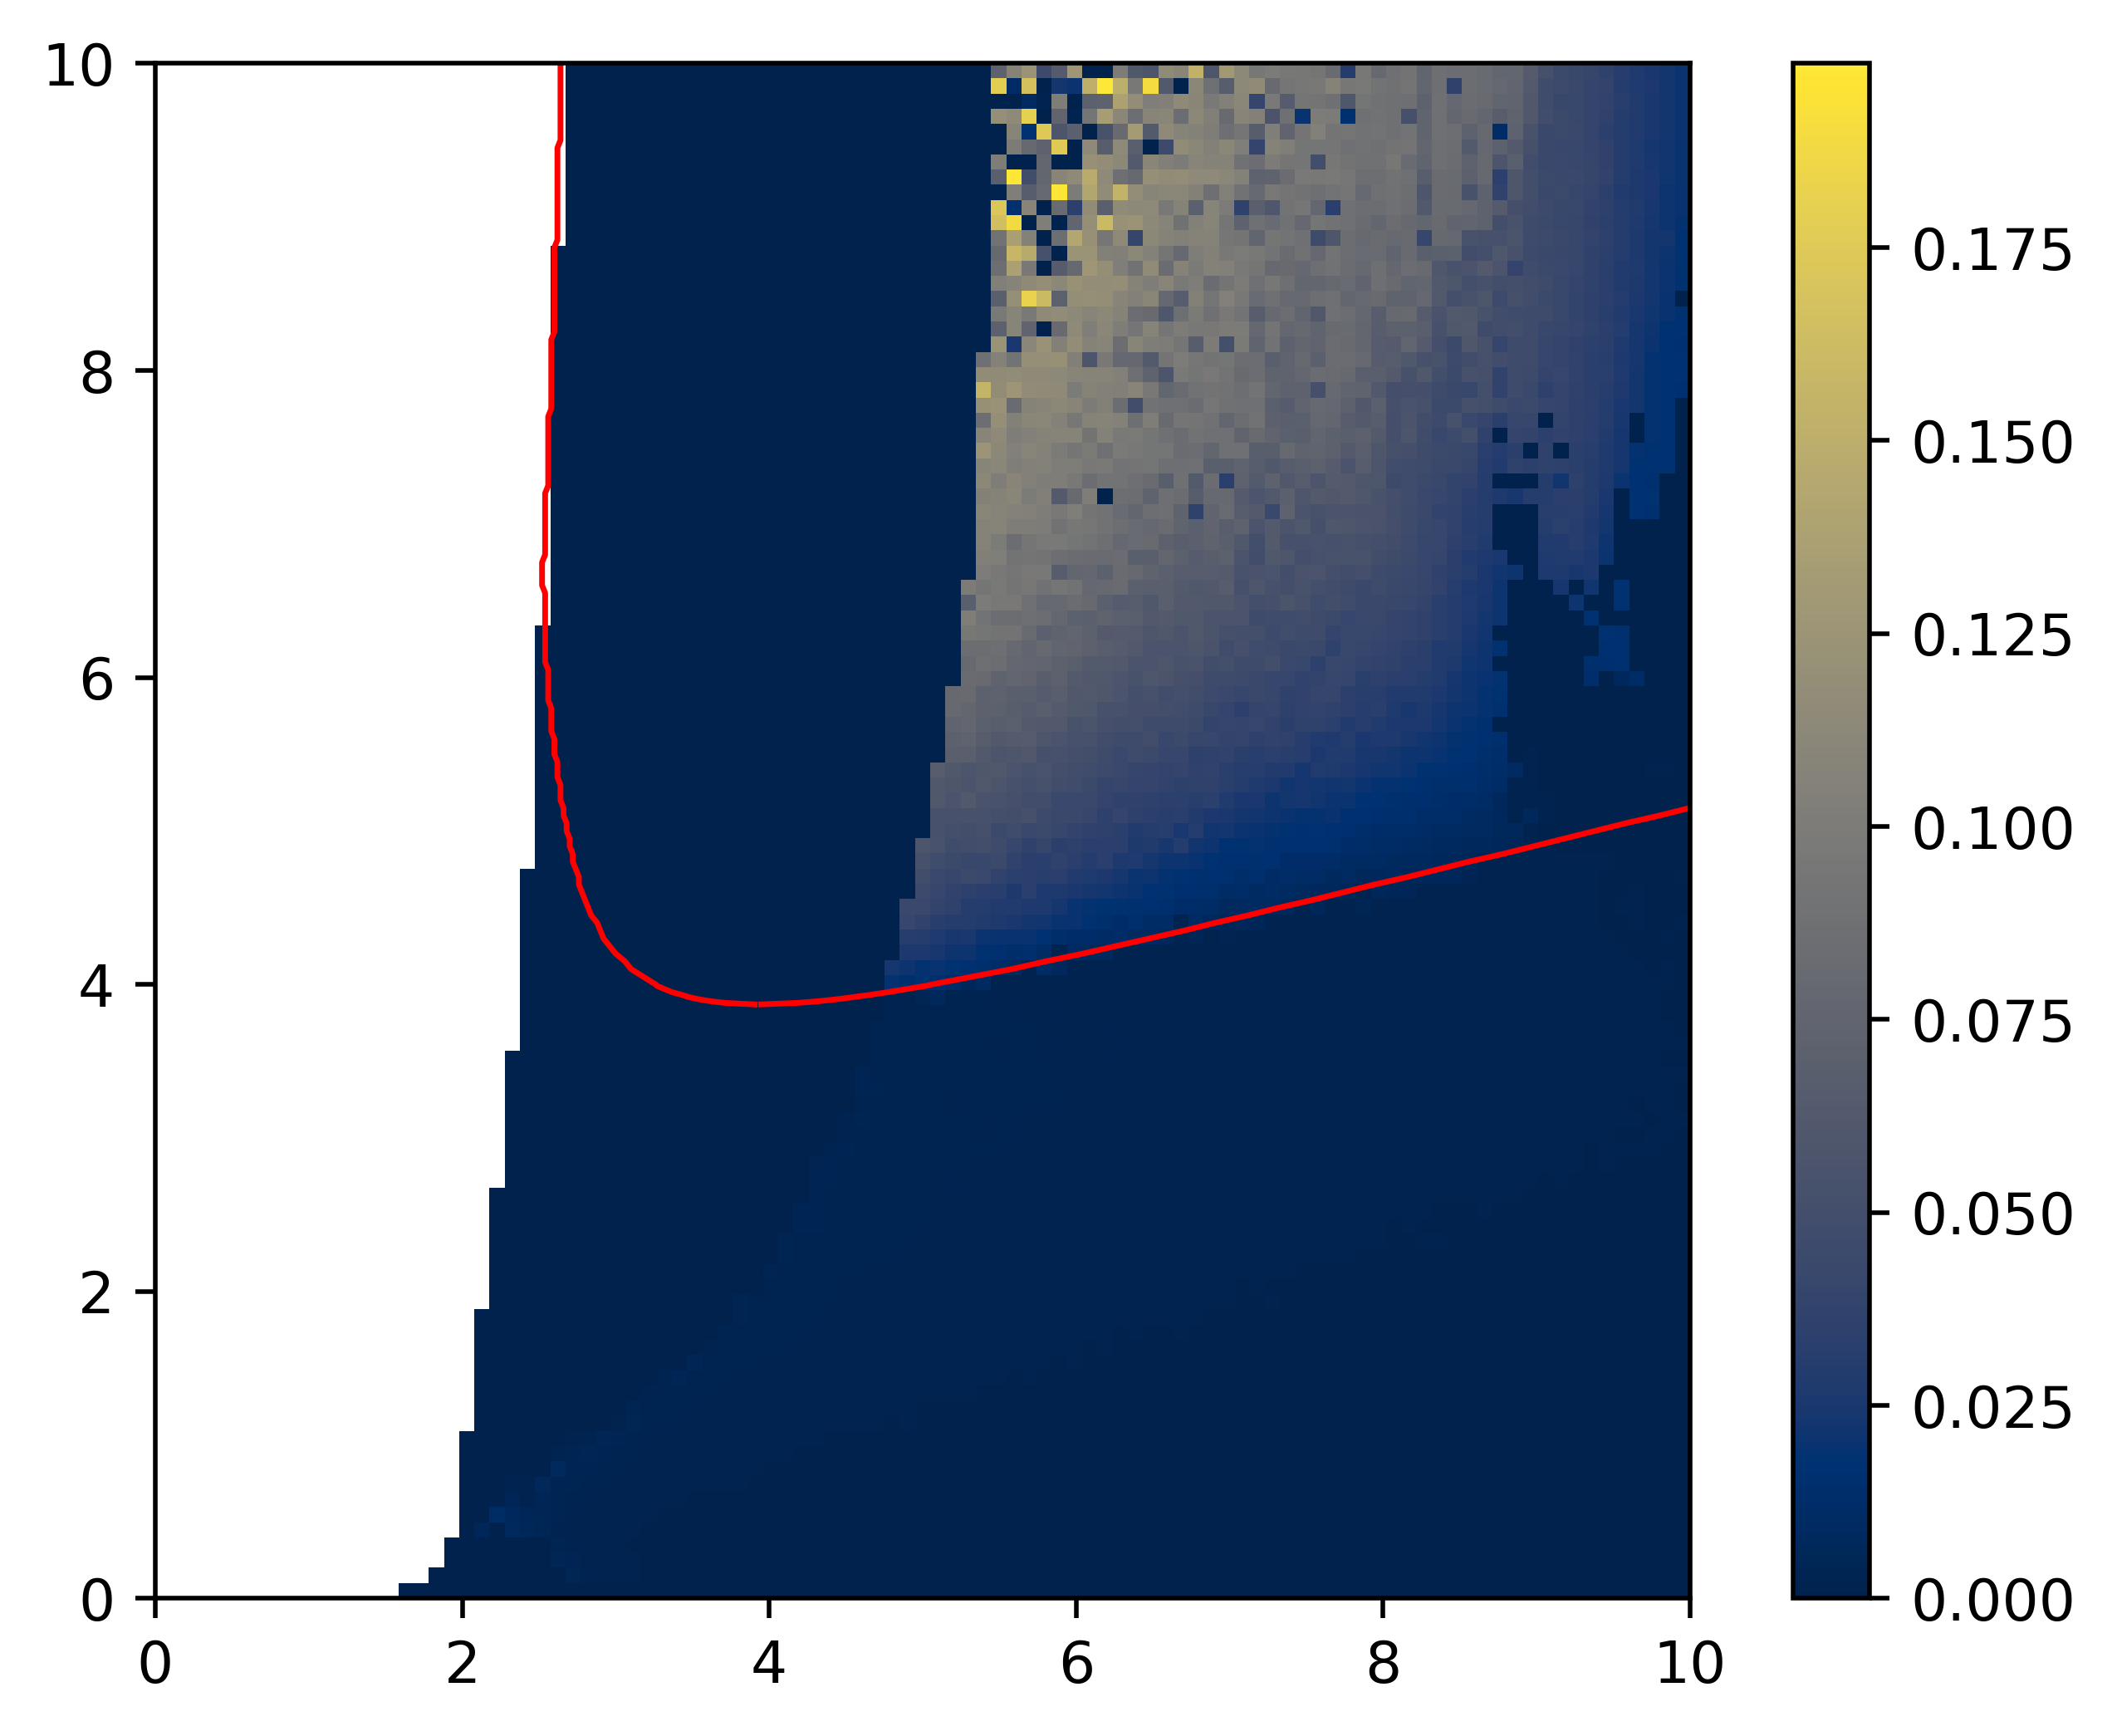

In [16]:
plt.figure(dpi=500)
plt.imshow(RMT.T-A_RDrH.T,origin='lower',vmin=0,cmap='cividis',extent=[Ks.min(), 10, ms.min(),10])

plt.plot(mcs['mc_Kd'],mcs['mc_d'],color='r',lw=1)
plt.plot(mcs['mc_Ku'],mcs['mc_u'],color='r',lw=1)
plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

Text(0, 0.5, 'm')

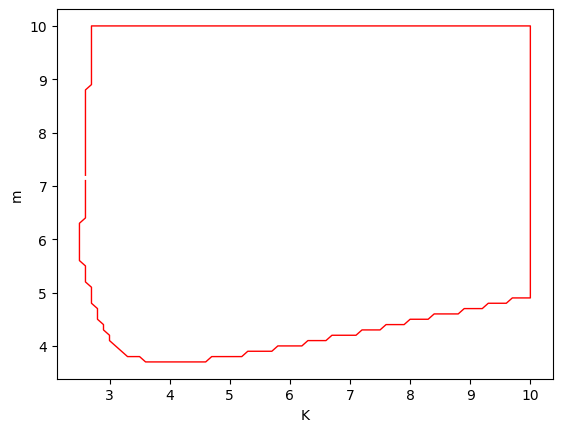

In [154]:
import scipy.ndimage
# 바깥쪽 경계선만 찾기 위해 마스크의 차이를 이용
mask = ~np.isnan(A_SIG)
boundary = mask ^ scipy.ndimage.binary_erosion(mask)
K_indices, m_indices = np.where(boundary)

# 경계선 점들을 순서대로 정렬하기 위해 복소수 평면에서 각도 계산
points = K_indices + 1j*m_indices
center = np.mean(points)
angles = np.angle(points - center)
sorted_indices = np.argsort(angles)

# 정렬된 순서대로 경계선 그리기
plt.plot(Ks[K_indices[sorted_indices]], ms[m_indices[sorted_indices]], 'r-', linewidth=1)
plt.xlabel('K')
plt.ylabel('m')

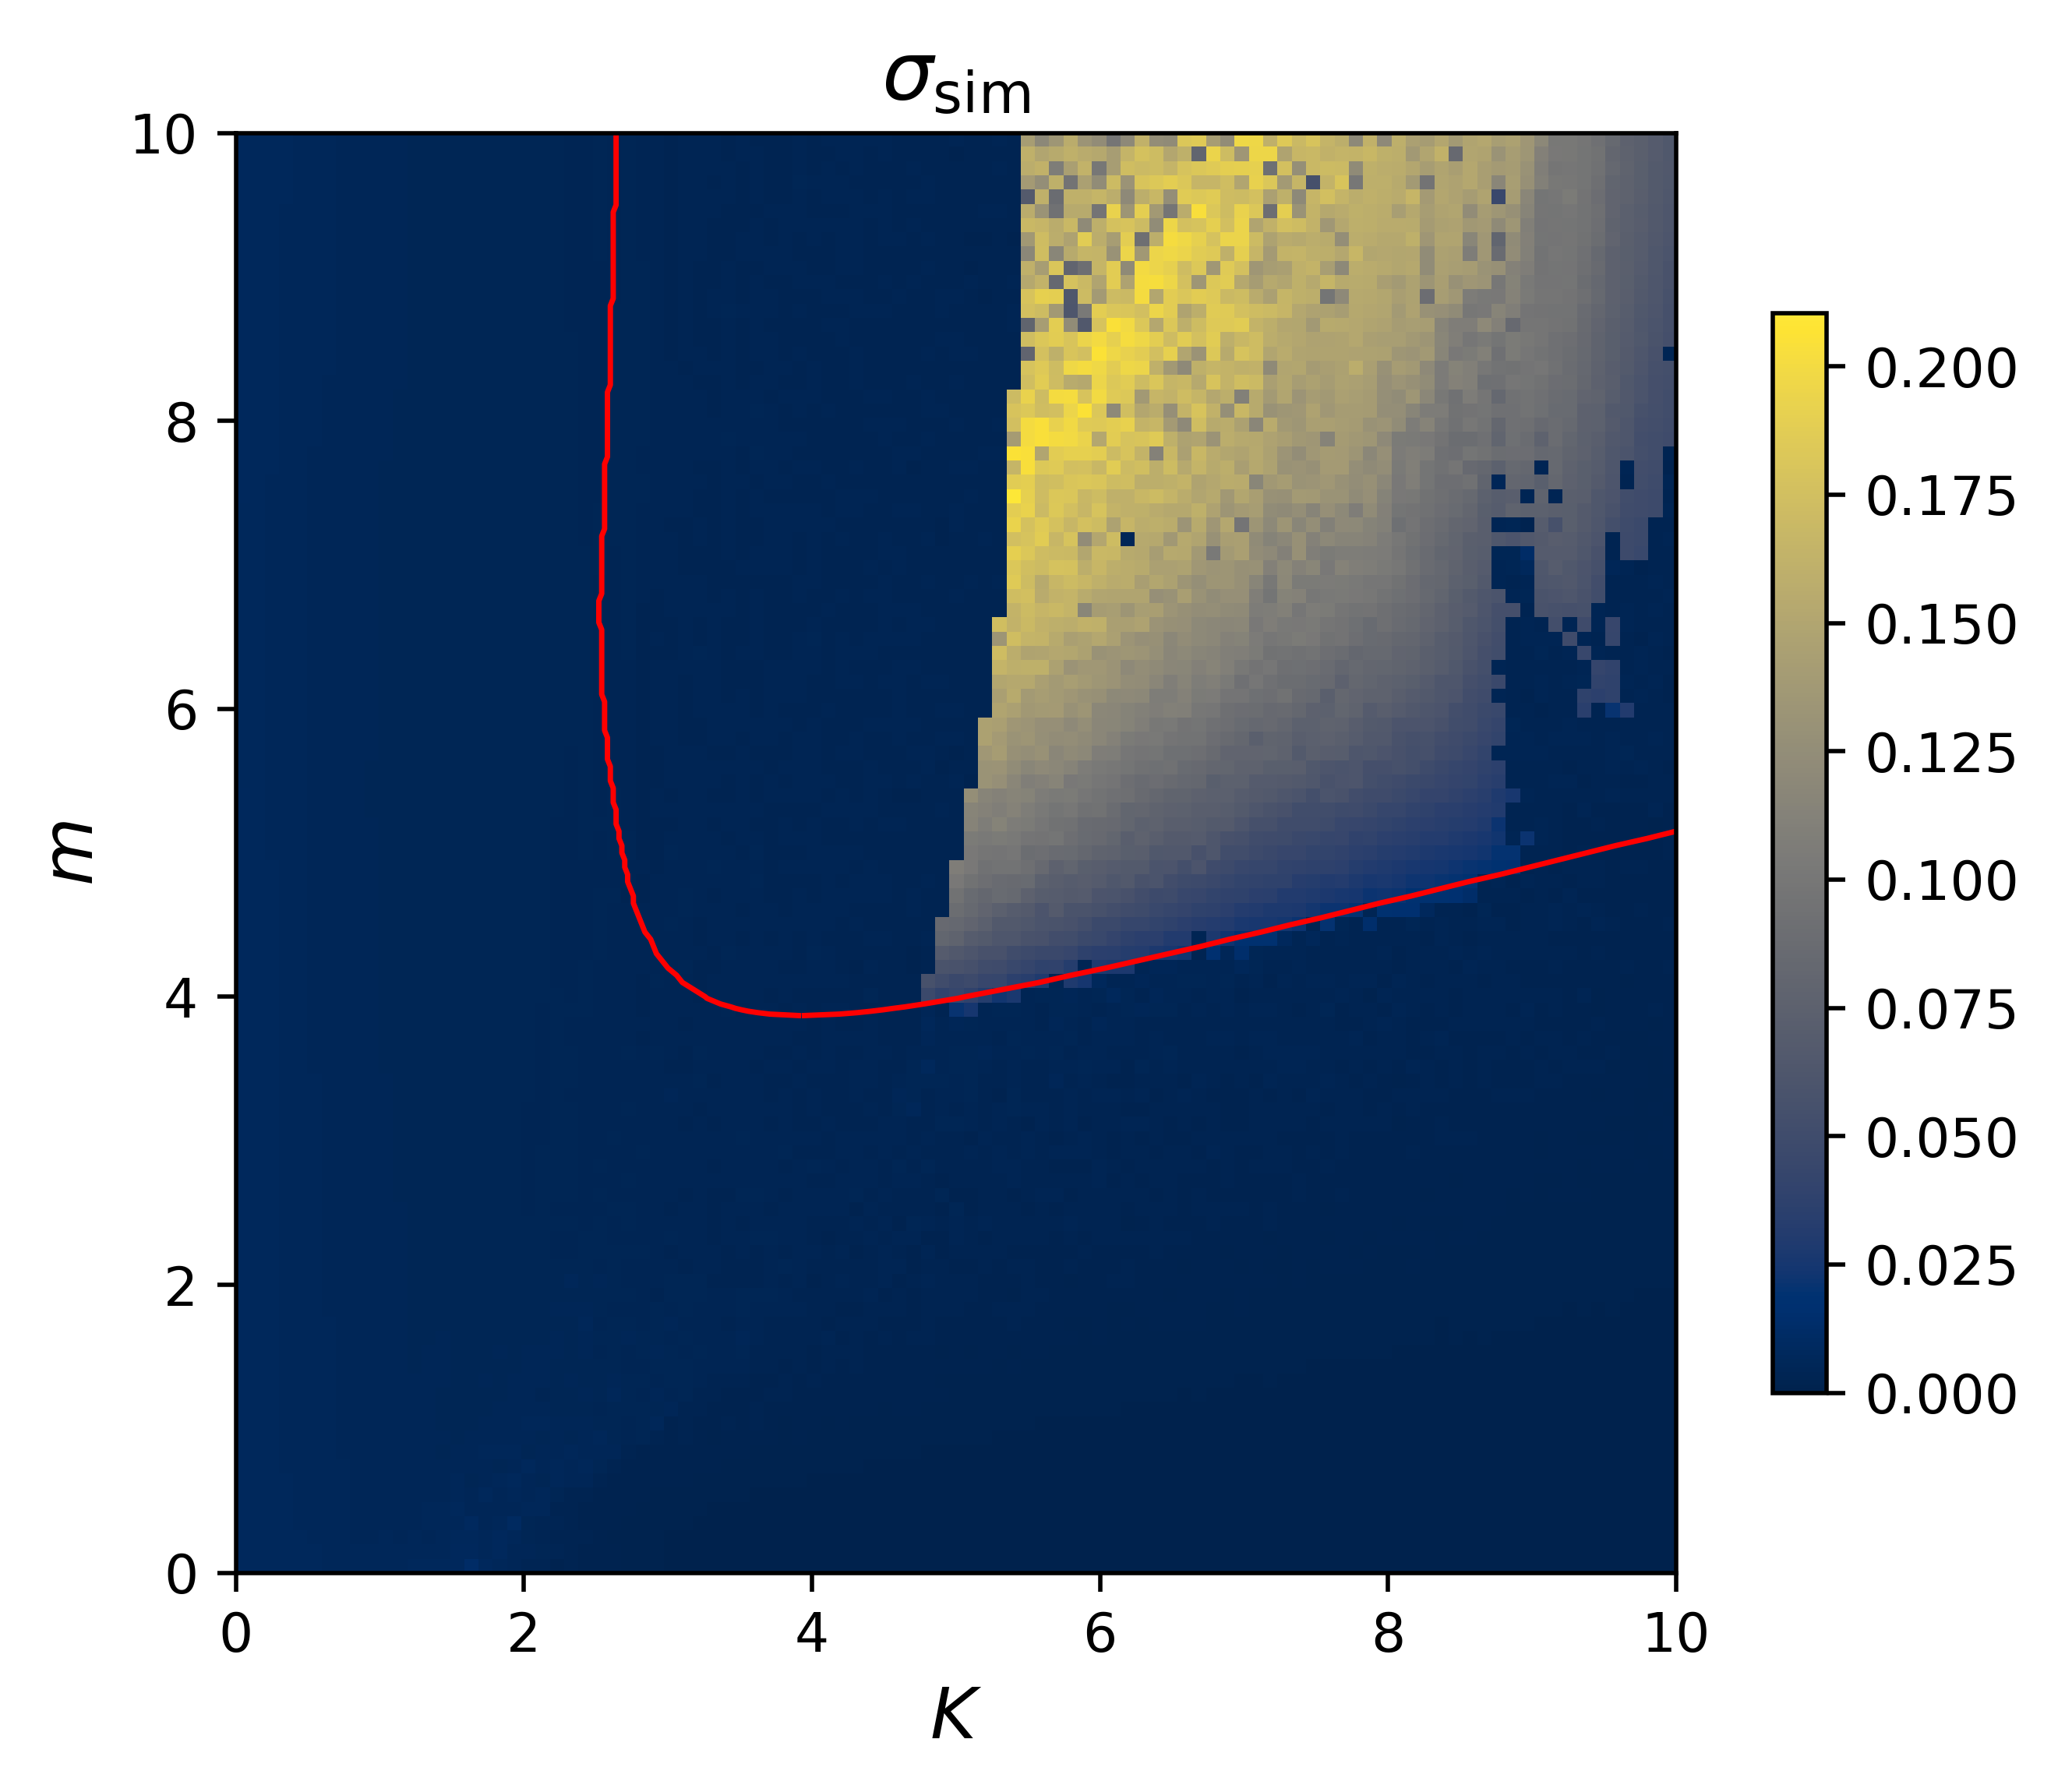

In [160]:
plt.figure(dpi=500)
plt.imshow(SIG_S.T,origin='lower',vmin=0,cmap='cividis',extent=[Ks.min(), 10, ms.min(),10])

plt.plot(mcs['mc_Kd'],mcs['mc_d'],color='r',lw=1)
plt.plot(mcs['mc_Ku'],mcs['mc_u'],color='r',lw=1)
plt.xlim(0,10)
plt.ylim(0,10)


plt.colorbar(shrink=0.75)
plt.ylabel(r'$m$',fontsize=13)
plt.xlabel(r'$K$',fontsize=13)
plt.title(r'$\sigma_{\rm{sim}}$', fontsize=15)
plt.gca().set_aspect('equal')

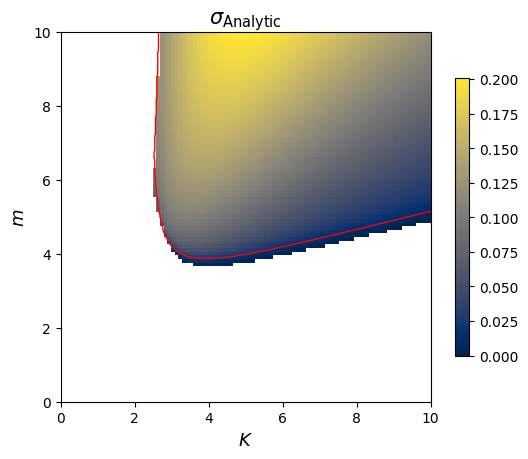

In [149]:
plt.imshow(A_SIG.T,origin='lower',vmin=0,cmap='cividis',extent=[Ks.min(), 10, ms.min(),10])
plt.plot(mcs['mc_Kd'],mcs['mc_d'],color='r',lw=1)
plt.plot(mcs['mc_Ku'],mcs['mc_u'],color='r',lw=1)
plt.xlim(0,10)
plt.ylim(0,10)


plt.colorbar(shrink=0.75)
plt.ylabel(r'$m$',fontsize=13)
plt.xlabel(r'$K$',fontsize=13)
plt.title(r'$\sigma_{\rm{Analytic}}$', fontsize=15)
plt.gca().set_aspect('equal')